<a href="https://colab.research.google.com/github/Nkhanhhhh/personal_projects/blob/main/PH%C3%82N_T%C3%8DCH_XU_H%C6%AF%E1%BB%9ANG_B%C3%81N_H%C3%80NG_C%E1%BB%A6A_WALMART_B%E1%BA%B0NG_M%C3%94_H%C3%8CNH_H%E1%BB%92I_QUY_TUY%E1%BA%BEN_T%C3%8DNH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PHÂN TÍCH XU HƯỚNG BÁN HÀNG CỦA WALMART BẰNG MÔ HÌNH HỒI QUY TUYẾN TÍNH (LINEAR REGRESSION MODEL)

# 1. GIỚI THIỆU
Trong môi trường kinh doanh đang phát triển nhanh chóng, tác động của các xu hướng theo mùa đối với doanh số bán hàng có ảnh hưởng lớn đến hiệu suất tài chính của một công ty, tạo ra biến động có thể lớn hơn hoặc nhỏ hơn nhiều so với mức trung bình. Việc không nhận biết và dự đoán chính xác những biến động theo mùa này có thể dẫn đến tổn thất tài chính đáng kể cho doanh nghiệp. Vì vậy, dự báo doanh số bán hàng trong tương lai dựa vào những dữ liệu đã có là một trong những chiến lược chủ chốt đối với mọi tổ chức. Những dự báo chính xác mang lại thông tin hữu ích để quản lý tồn kho, tính toán doanh thu và đưa ra quyết định về việc đầu tư mới. Vì vậy, nhóm chúng em quyết định nghiên cứu bộ dữ liệu  “Dự đoán doanh số bán hàng của Walmart” được cung cấp và đưa ra các phân tích về yếu tố ảnh hưởng đến doanh số bán hàng trong tương lai.

Bộ dữ liệu này cung cấp thông tin về một phần doanh thu bán hàng của Walmart từ năm 2010 đến năm 2013 và các yếu tố đóng góp vào đó, thông qua cả dữ liệu định lượng và định tính. Bộ dữ liệu bao gồm tổng cộng 10 biến với 7 biến định lượng và 3 biến định tính.
- Biến định tính:
    - Date
    - IsHoliday
    - Store
- Biến định lượng:
    - Dept
    - Weekly sales
    - Tempt
    - Fuel price
    - Markdown
    - CPI
    - Unemployment
- Trong bài báo cáo này, chúng em tập trung vào việc xác định các yếu tố ảnh hưởng đến doanh số bán hàng như ngày lễ, thời tiết, giá nhiên liệu, chỉ số giá tiêu dùng (CPI), tỷ lệ thất nghiệp, kích thước cửa hàng, các chương trình giảm giá, số lượng cửa hàng và phòng ban.

<b>Bài báo cáo này nhằm mục đích:
- Xây dựng một mô hình dự đoán doanh thu cho các cửa hàng bán lẻ.
- Hỗ trợ công ty trong quản lý tồn kho thông minh và tính toán doanh thu hiệu quả.
- Hỗ trợ quyết định đầu tư mới dựa trên thông tin chính xác và chi tiết.

<b>Ngoài phần Giới thiệu, báo cáo này sẽ bao gồm ba phần chính:
1. Tổng quan lý thuyết (Literature review): Giới thiệu chung về tầm quan trọng của nghiên cứu, khuôn khổ khái niệm và các yếu tố quyết định doanh thu được nghiên cứu trong bài.
    
2. Phương pháp luận (Methodology):
- Thực hiện EDA (Exploratory Data Analysis – Phân tích khám phá dữ liệu) để phân tích những yếu tố có thể ảnh hưởng đến doanh số bán hàng; thông qua Hệ số tương quan (Pearson Correlation), Biến độc lập và Biểu đồ tương quan.
- Trực quan hóa dữ liệu (Data visulazation)
- Xây dựng mô hình dự đoán
    
3. Kết luận: Tóm tắt lại về các biến đã chọn và các mô hình đã chạy.


- Biến phụ thuộc: Weekly_Sales
- Biến độc lập: Các biến còn lại

# 2. EDA

## 2.1 Nhập thư viện và nguồn dữ liệu

### IMPORT LIBARARIES

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot

from math import sqrt
import warnings

from scipy import stats
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler

import pickle
from os import path

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

### IMPORT DATA

In [ ]:
file_source1="/Users/mwtj2/Documents/TINH314/Walmart Sales Forecast/Walmart/Data raw/dataset/features.csv"
file_source2="/Users/mwtj2/Documents/TINH314/Walmart Sales Forecast/Walmart/Data raw/dataset/stores.csv"
file_source3="/Users/mwtj2/Documents/TINH314/Walmart Sales Forecast/Walmart/Data raw/dataset/test.csv"
file_source4="/Users/mwtj2/Documents/TINH314/Walmart Sales Forecast/Walmart/Data raw/dataset/train.csv"
df_ft=pd.read_csv(file_source1)
df_ft

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [ ]:
df_store=pd.read_csv(file_source2)
df_store

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [ ]:
df_test=pd.read_csv(file_source3)
df_test

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [ ]:
df_train=pd.read_csv(file_source4)
df_train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


## 2.2. Làm sạch dữ liệu (Data Cleaning)
<strong>Các dataframe sau khi đã import dữ liệu:</strong>
- df_ft: features.csv
- df_store: stores.csv
- df_test: test.csv
- df_train: train.csv


<b> Đây là 2 file data lớn, để phân tích data 1 cách cụ thể và không bỏ qua các góc nhìn từ các biến. Nhóm em đã phân tích data theo 2 Dataframe:
- <b>Dataframe 1:
    - Nhóm data theo biến Store và Dept -> Để phân tích Weekly_Sales của Store tại từng Department
    - Data.shape(374273 rows × 15 columns)
- <b>Dataframe 2:
    - Nhóm data theo biến Weekly_Sales -> Các giá trị được chia theo tuần, các biến lấy giá trị mean
    - Data.shape(143 rows × 16 columns)

### a.Thay thế các giá trị NaN

<b> Dataset features.csv
- Dataset features.csv chứa nhiều giá trị NaN, ta cần thay thế các giá trị NaN để có thể tiến hành phân tích data
- Thay thế gía trị NaN bằng giá trị trung bình mean ở các biến:
    - CPI
    - Unemployment
    - MarkDown

In [ ]:
df_ft['CPI'].isnull().sum()
avr_CPI=df_ft['CPI'].astype('float').mean()
df_ft['CPI'].replace(np.nan, avr_CPI, inplace=True)
df_ft

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,172.460809,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,172.460809,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,172.460809,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,172.460809,NaN,False


In [ ]:
df_ft['Unemployment'].isnull().sum()
avr_Unemployment=df_ft['Unemployment'].astype('float').mean()
df_ft['Unemployment'].replace(np.nan, avr_Unemployment, inplace=True)
df_ft

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106000,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106000,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106000,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106000,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106000,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,172.460809,7.826821,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,172.460809,7.826821,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,172.460809,7.826821,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,172.460809,7.826821,False


Các biến MarkDown là giá trị giảm giá, đây là một biến quan trọng trong quá trình phân tích và dự đoán Weekly Sales trong tương lai. Ta cần xử lý dữ liệu này bằng cách:
- Thay thế các giá trị NaN và các giá trị bé hơn

In [ ]:
#xử lý markdown column ở file features
#Markdown: giảm giá -> đánh giá mức độ giảm gía ảnh hưởng như thế nào nhưng có rất nhiều dữ liệu NaN
df_ft.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI                0
Unemployment       0
IsHoliday          0
dtype: int64

In [ ]:
#Chuyển dữ liệu NaN và bé hơn 0 của cột Markdown = 0 -> ngày đó không có giảm giá
for i in range(1,6):
  df_ft["MarkDown"+str(i)] = df_ft["MarkDown"+str(i)].apply(lambda x: 0 if x < 0 else x)
  df_ft["MarkDown"+str(i)].fillna(value=0,inplace=True)
df_ft

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106000,False
1,1,2010-02-12,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106000,True
2,1,2010-02-19,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106000,False
3,1,2010-02-26,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106000,False
4,1,2010-03-05,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106000,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,172.460809,7.826821,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,172.460809,7.826821,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,172.460809,7.826821,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,172.460809,7.826821,False


### b. Gộp dữ liệu (Merging Data)
Vì các file data là các file đơn lẻ, có các observations trùng lặp vậy nên để phân tích và có cái nhìn tổng quan, ta cần gộp các file data dựa trên sự trùng lặp về biến

In [ ]:
#merge df_train + df_features
df = df_train.merge(df_ft, on=["Store", "Date"], how="inner")
df

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False


In [ ]:
#merge df + df store
df = df.merge(df_store, on=["Store"], how="inner")
df

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221


Sau khi merge các file data, sẽ có các biến trùng lặp, ta cần loại bỏ và thay đổi tên cột để có file data hoàn chỉnh

In [ ]:
#delete the double columns and change name
df.drop(['IsHoliday_y'], axis=1,inplace=True)
df.rename(columns={'IsHoliday_x':'IsHoliday'}, inplace=True)
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221


In [ ]:
df.shape

(421570, 16)

In [ ]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,2590.074819,880.070274,468.092929,1083.132268,1662.772385,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,6052.385934,5084.520381,5528.872994,3894.529945,4207.629321,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.000000,0.000000,0.000000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [ ]:
#Số lượng Store
df['Store'].nunique()

45

In [ ]:
#Số lượng Department
df['Dept'].nunique()

81

### c. Spliting date column
Data có biến Date bao gồm giá trị ngày tháng năm. Nếu để nguyên theo giá trị này sẽ khó để phân tích và dự đoán sale theo tuần. Ta cần tách giá trị Date thành các giá trị đơn lẻ

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by=['Date'],inplace=True)
df.set_index(df.Date, inplace=True)

In [ ]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week
Date,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,2010,2,5
2010-02-05,35,3,2010-02-05,14612.19,False,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,B,103681,2010,2,5
2010-02-05,35,4,2010-02-05,26323.15,False,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,B,103681,2010,2,5
2010-02-05,35,5,2010-02-05,36414.63,False,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,B,103681,2010,2,5
2010-02-05,35,6,2010-02-05,11437.81,False,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,B,103681,2010,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,13,49,2012-10-26,7770.71,False,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,A,219622,2012,10,43
2012-10-26,13,50,2012-10-26,1486.00,False,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,A,219622,2012,10,43
2012-10-26,13,52,2012-10-26,4738.93,False,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,A,219622,2012,10,43


### d. Phát hiện và loại bỏ dữ liệu ngoại lệ (Outlier Detection and Abnormalities)
Bước tiếp theo cần lọc và loại bỏ các biến ngoại lai và bất thường

<b> Outliers

In [ ]:

agg_data = df.groupby(['Store', 'Dept']).Weekly_Sales.agg(['max', 'min', 'mean', 'median', 'std']).reset_index()
agg_data.isnull().sum()

Store      0
Dept       0
max        0
min        0
mean       0
median     0
std       37
dtype: int64

In [ ]:

store_data = pd.merge(left=df,right=agg_data,on=['Store', 'Dept'],how ='left')
store_data.dropna(inplace=True)
df = store_data.copy()
del store_data

In [ ]:

df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by=['Date'],inplace=True)
df.set_index(df.Date, inplace=True)
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Type,Size,Year,Month,Week,max,min,mean,median,std
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,...,A,151315,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032
2010-02-05,17,74,2010-02-05,10218.96,False,23.11,2.666,0.0,0.0,0.0,...,B,93188,2010,2,5,48049.95,9139.26,15300.776993,13364.35,6553.956954
2010-02-05,17,78,2010-02-05,1.00,False,23.11,2.666,0.0,0.0,0.0,...,B,93188,2010,2,5,20.00,-19.76,2.605714,1.00,14.989764
2010-02-05,17,79,2010-02-05,31042.73,False,23.11,2.666,0.0,0.0,0.0,...,B,93188,2010,2,5,32764.63,20802.76,27208.437622,27288.06,2097.747789
2010-02-05,17,80,2010-02-05,842.00,False,23.11,2.666,0.0,0.0,0.0,...,B,93188,2010,2,5,1324.44,298.66,798.676713,822.91,214.316702


<b>Tạo biến TotalMarkDown
- Dataframe mới bao gồm 5 giá trị MarkDown. Tuy nhiên để rút gọn dữ liệu và lọc bỏ các giá trị không cần thiết, ta có thể gộp các giá trị MarkDown. Điều này không làm thay đổi ý nghĩa về mặt thống kê của biến MarkDown


In [ ]:
#gộp các markdown thành totalmarkdown
df['Total_MarkDown'] = df['MarkDown1']+df['MarkDown2']+df['MarkDown3']+df['MarkDown4']+df['MarkDown5']
df.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = 1,inplace=True)
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
Date,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032,0.0
2010-02-05,17,74,2010-02-05,10218.96,False,23.11,2.666,126.442065,6.548,B,93188,2010,2,5,48049.95,9139.26,15300.776993,13364.35,6553.956954,0.0
2010-02-05,17,78,2010-02-05,1.00,False,23.11,2.666,126.442065,6.548,B,93188,2010,2,5,20.00,-19.76,2.605714,1.00,14.989764,0.0
2010-02-05,17,79,2010-02-05,31042.73,False,23.11,2.666,126.442065,6.548,B,93188,2010,2,5,32764.63,20802.76,27208.437622,27288.06,2097.747789,0.0
2010-02-05,17,80,2010-02-05,842.00,False,23.11,2.666,126.442065,6.548,B,93188,2010,2,5,1324.44,298.66,798.676713,822.91,214.316702,0.0


In [ ]:
df['Total_MarkDown'].describe()

count    421533.000000
mean       6683.495791
std       14748.539625
min           0.000000
25%           0.000000
50%           0.000000
75%        8075.260000
max      160510.610000
Name: Total_MarkDown, dtype: float64

In [ ]:
numeric_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown']
data_numeric = df[numeric_col].copy()
df.shape

(421533, 20)

<b>Lọc các hàng của DataFrame dựa trên điểm z của các cột số, chỉ giữ các hàng có giá trị số nằm trong khoảng 2,5 độ lệch chuẩn so với giá trị trung bình của mỗi cột.


In [ ]:
df = df[(np.abs(stats.zscore(data_numeric)) < 2.5).all(axis = 1)]
df.shape

(375438, 20)

### e. Doanh số bán hàng hàng tuần âm (Negative Weekly Sales)

Quan sát biến Weekly Sales thấy có nhiều tháng giá trị Weekly Sales bé hơn 0. Với mục đích chọn lựa các observations điển hình và không làm ảnh hưởng đến quá trình phân tích, nhóm chúng em quyết định sẽ loại bỏ các giá trị âm của biến Weekly_Sales

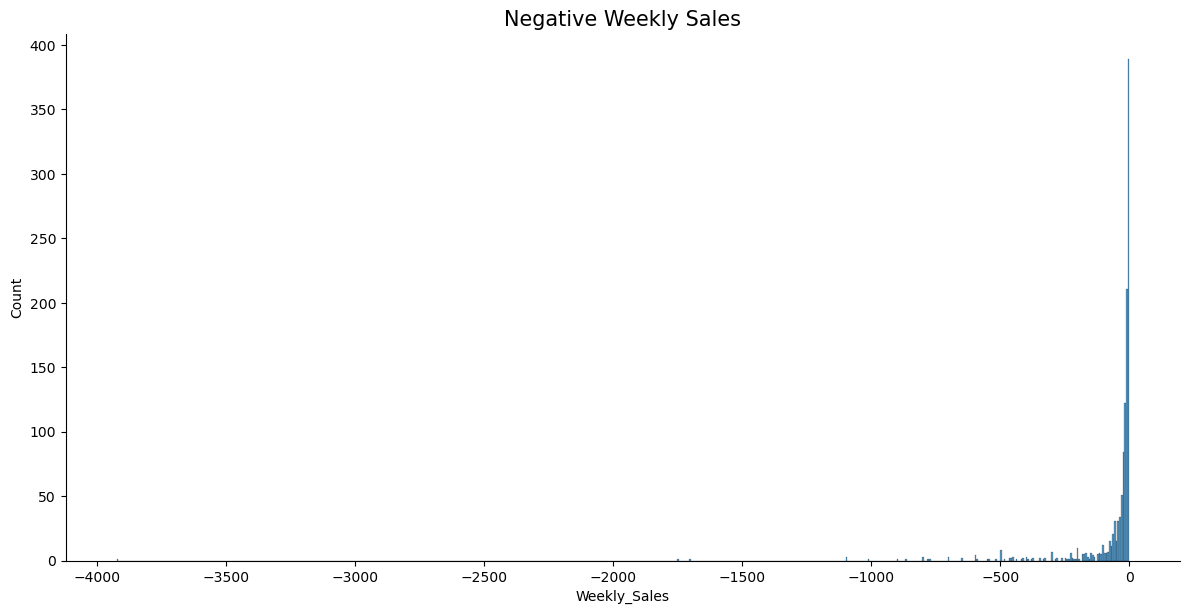

In [ ]:
#negative weekly sales
y = df["Weekly_Sales"][df.Weekly_Sales < 0]
sns.displot(y,height=6,aspect=2)
plt.title("Negative Weekly Sales", fontsize=15)
plt.show()


In [ ]:
df=df[df['Weekly_Sales']>=0]
df.shape

(374247, 20)

In [ ]:
df['IsHoliday'] = df['IsHoliday'].astype('int')

<b>Ta có DataFrame 1: 'df' bao gồm 374273 rows × 20 columns

In [ ]:
#data được chia theo store và dept
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
Date,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,0,42.31,2.572,211.096358,8.106,A,151315,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032,0.00
2010-02-05,17,74,2010-02-05,10218.96,0,23.11,2.666,126.442065,6.548,B,93188,2010,2,5,48049.95,9139.26,15300.776993,13364.35,6553.956954,0.00
2010-02-05,17,78,2010-02-05,1.00,0,23.11,2.666,126.442065,6.548,B,93188,2010,2,5,20.00,-19.76,2.605714,1.00,14.989764,0.00
2010-02-05,17,79,2010-02-05,31042.73,0,23.11,2.666,126.442065,6.548,B,93188,2010,2,5,32764.63,20802.76,27208.437622,27288.06,2097.747789,0.00
2010-02-05,17,80,2010-02-05,842.00,0,23.11,2.666,126.442065,6.548,B,93188,2010,2,5,1324.44,298.66,798.676713,822.91,214.316702,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,5,36,2012-10-26,370.04,0,71.70,3.506,224.037814,5.422,B,34875,2012,10,43,2391.50,40.50,587.063706,495.00,443.674715,2281.40
2012-10-26,5,38,2012-10-26,56913.22,0,71.70,3.506,224.037814,5.422,B,34875,2012,10,43,75177.91,38694.59,55199.791888,54934.49,8034.328396,2281.40
2012-10-26,5,40,2012-10-26,19823.71,0,71.70,3.506,224.037814,5.422,B,34875,2012,10,43,23968.31,15786.74,19328.994965,19405.79,1604.766185,2281.40


<b> Dựa trên DataFrame 1 tạo ra DataFrame 2 chia theo biến Date: 'df_2'

In [ ]:
df.rename(columns={'Date':'Date1'}, inplace=True)
df

,Store,Dept,Date1,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
Date,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,0,42.31,2.572,211.096358,8.106,A,151315,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032,0.00
2010-02-05,17,74,2010-02-05,10218.96,0,23.11,2.666,126.442065,6.548,B,93188,2010,2,5,48049.95,9139.26,15300.776993,13364.35,6553.956954,0.00
2010-02-05,17,78,2010-02-05,1.00,0,23.11,2.666,126.442065,6.548,B,93188,2010,2,5,20.00,-19.76,2.605714,1.00,14.989764,0.00
2010-02-05,17,79,2010-02-05,31042.73,0,23.11,2.666,126.442065,6.548,B,93188,2010,2,5,32764.63,20802.76,27208.437622,27288.06,2097.747789,0.00
2010-02-05,17,80,2010-02-05,842.00,0,23.11,2.666,126.442065,6.548,B,93188,2010,2,5,1324.44,298.66,798.676713,822.91,214.316702,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,5,36,2012-10-26,370.04,0,71.70,3.506,224.037814,5.422,B,34875,2012,10,43,2391.50,40.50,587.063706,495.00,443.674715,2281.40
2012-10-26,5,38,2012-10-26,56913.22,0,71.70,3.506,224.037814,5.422,B,34875,2012,10,43,75177.91,38694.59,55199.791888,54934.49,8034.328396,2281.40
2012-10-26,5,40,2012-10-26,19823.71,0,71.70,3.506,224.037814,5.422,B,34875,2012,10,43,23968.31,15786.74,19328.994965,19405.79,1604.766185,2281.40


In [ ]:
df_2=df.groupby("Date1",as_index=True).mean(numeric_only=True)
df_2

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
Date1,,,,,,,,,,,,,,,,,,
2010-02-05,22.393927,43.114263,13179.822833,0.0,33.275406,2.700768,170.800892,8.161107,137664.453855,2010.0,2.0,5.0,29685.589525,8230.358290,13096.416913,12308.597751,3543.489782,0.000000
2010-02-12,21.989102,43.298008,13256.745641,1.0,32.333747,2.678407,170.249991,8.189948,136716.282976,2010.0,2.0,6.0,29747.314104,8352.830778,13236.142245,12462.475814,3531.657923,0.000000
2010-02-19,22.039910,43.335323,13204.451503,0.0,35.790287,2.656191,170.230372,8.195977,136147.918314,2010.0,2.0,7.0,29796.714957,8241.306016,13099.642012,12315.501479,3548.410771,0.000000
2010-02-26,22.014195,43.271573,12301.890347,0.0,37.802663,2.675833,170.515399,8.190962,136614.568920,2010.0,2.0,8.0,30661.807452,8618.664423,13615.233723,12823.640799,3624.789394,0.000000
2010-03-05,22.058179,42.994711,12748.958644,0.0,41.552667,2.713657,170.572477,8.191097,136560.218738,2010.0,3.0,9.0,30121.400472,8325.154193,13236.800978,12445.497446,3586.677761,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,22.241183,43.403278,12418.217542,0.0,68.230121,3.850897,176.797361,7.204963,133109.659067,2012.0,9.0,39.0,30615.320684,8531.404849,13479.956032,12686.106813,3613.044962,9794.491539
2012-10-05,22.431922,43.433322,12841.687119,0.0,65.446447,3.849030,176.051701,6.954383,134775.296465,2012.0,10.0,40.0,30056.078999,8141.008432,12975.691939,12182.872426,3570.777211,11355.387532
2012-10-12,22.347299,43.647161,12770.448251,0.0,57.683889,3.897798,176.155450,6.958347,134854.803324,2012.0,10.0,41.0,30657.979616,8363.921624,13271.105296,12464.498315,3627.397921,8031.754017


In [ ]:
df_2.drop(['Store','Dept'], axis=1)

,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
Date1,,,,,,,,,,,,,,,,
2010-02-05,13179.822833,0.0,33.275406,2.700768,170.800892,8.161107,137664.453855,2010.0,2.0,5.0,29685.589525,8230.358290,13096.416913,12308.597751,3543.489782,0.000000
2010-02-12,13256.745641,1.0,32.333747,2.678407,170.249991,8.189948,136716.282976,2010.0,2.0,6.0,29747.314104,8352.830778,13236.142245,12462.475814,3531.657923,0.000000
2010-02-19,13204.451503,0.0,35.790287,2.656191,170.230372,8.195977,136147.918314,2010.0,2.0,7.0,29796.714957,8241.306016,13099.642012,12315.501479,3548.410771,0.000000
2010-02-26,12301.890347,0.0,37.802663,2.675833,170.515399,8.190962,136614.568920,2010.0,2.0,8.0,30661.807452,8618.664423,13615.233723,12823.640799,3624.789394,0.000000
2010-03-05,12748.958644,0.0,41.552667,2.713657,170.572477,8.191097,136560.218738,2010.0,3.0,9.0,30121.400472,8325.154193,13236.800978,12445.497446,3586.677761,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,12418.217542,0.0,68.230121,3.850897,176.797361,7.204963,133109.659067,2012.0,9.0,39.0,30615.320684,8531.404849,13479.956032,12686.106813,3613.044962,9794.491539
2012-10-05,12841.687119,0.0,65.446447,3.849030,176.051701,6.954383,134775.296465,2012.0,10.0,40.0,30056.078999,8141.008432,12975.691939,12182.872426,3570.777211,11355.387532
2012-10-12,12770.448251,0.0,57.683889,3.897798,176.155450,6.958347,134854.803324,2012.0,10.0,41.0,30657.979616,8363.921624,13271.105296,12464.498315,3627.397921,8031.754017


## 2.3 Phân tích khám phá dữ liệu (Exploratory Data Analysis)

Chúng em sử dụng dữ liệu từ DataFrame 2 (chia dữ liệu theo Date) để đánh giá về p-value, mức độ tương quan và biểu đồ tương quan của biến độc lập và biến phụ thuộc

### a. Phân tích P-value và tương quan Pearson

<h5>Temperature và Weekly Sales

In [ ]:
pearson_coef, p_value = stats.pearsonr(df_2['Temperature'], df_2['Weekly_Sales'])
print("Hệ số tương quan Pearson là", pearson_coef, "với giá trị P-value =", p_value)

Hệ số tương quan Pearson là 0.14212527123012492 với giá trị P-value = 0.09040573839476466


<b>Kết luận:

Bởi vì p-value  <
  0.1, Chúng ta có thể khẳng định rằng có bằng chứng yếu cho thấy mối tương quan giữa 2 biến 'Temperature' và 'Weekly_Sales' là có ý nghĩa về mặt thống kê, và mối quan hệ tuyến tính yếu (~0.142, gần bằng 0)

<h5>Fuel_Price và Weekly_Sales

In [ ]:
#Fuel_Price và Weekly_Sales
pearson_coef, p_value = stats.pearsonr(df_2['Fuel_Price'], df_2['Weekly_Sales'])
print("Hệ số tương quan Pearson là", pearson_coef, "với giá trị P-value =", p_value)

Hệ số tương quan Pearson là -0.125420576199714 với giá trị P-value = 0.1355553260967024


<b>Kết luận:
<p>Bởi vì p-value $>$ 0.1, Chúng ta có thể khẳng định rằng không có bằng chứng cho thấy mối tương quan giữa 2 biến 'Fuel_Price' và 'Weekly_Sales' là có ý nghĩa về mặt thống kê,
     và mối quan hệ tuyến tính yếu (~-0.1254, gần bằng 0)<p>

<h5>CPI và Weekly_Sales

In [ ]:
#CPI và Weekly_Sales
pearson_coef, p_value = stats.pearsonr(df_2['CPI'], df_2['Weekly_Sales'])
print("Hệ số tương quan Pearson là", pearson_coef, "với giá trị P-value =", p_value)

Hệ số tương quan Pearson là -0.4141614155898267 với giá trị P-value = 2.718344140941411e-07


<b>Kết luận:
<p>Bởi vì p-value $<$ 0.001, Chúng ta có thể khẳng định rằng có bằng chứng mạnh cho thấy mối tương quan giữa 2 biến 'CPI' và 'Weekly_Sales' là có ý nghĩa về mặt thống kê,
     mặc dù mối quan hệ tuyến tính trung bình (~-0.4141)<p>

<h5>Unemployment và Weekly_Sales

In [ ]:
pearson_coef, p_value = stats.pearsonr(df_2['Unemployment'], df_2['Weekly_Sales'])
print("Hệ số tương quan Pearson là", pearson_coef, "với giá trị P-value =", p_value)

Hệ số tương quan Pearson là 0.17524485106284252 với giá trị P-value = 0.036308113786630965


<b>Kết luận:
<p>Bởi vì p-value $<$ 0.05, Chúng ta có thể khẳng định rằng có bằng chứng vừa phải cho thấy mối tương quan giữa 2 biến 'Unemployment' và 'Weekly_Sales' là có ý nghĩa về mặt thống kê,
      mặc dù mối quan hệ tuyến tính yếu (~0.1752, gần bằng 0)<p>

<h5>Size và Weekly_Sales

In [ ]:
pearson_coef, p_value = stats.pearsonr(df_2['Size'], df_2['Weekly_Sales'])
print("Hệ số tương quan Pearson là", pearson_coef, "với giá trị P-value =", p_value)

Hệ số tương quan Pearson là 0.5949863607889553 với giá trị P-value = 4.652137207737036e-15


<b>Kết luận:
<p>Bởi vì p-value $<$ 0.001, Chúng ta có thể khẳng định rằng có bằng chứng mạnh cho thâys mối tương quan giữa 2 biến 'Size' và 'Weekly_Sales' là có ý nghĩa về mặt thống kê,
     mặc dù mối quan hệ tuyến tính mạnh (~0.5949,lớn hơn 0.5)<p>

<h5>Total_MarkDown và Weekly_Sales

In [ ]:
pearson_coef, p_value = stats.pearsonr(df_2['Total_MarkDown'], df_2['Weekly_Sales'])
print("Hệ số tương quan Pearson là", pearson_coef, "với giá trị P-value =", p_value)

Hệ số tương quan Pearson là -0.31491973287966224 với giá trị P-value = 0.00012773740222653973


<b>Kết luận:
<p>Bởi vì p-value $<$ 0.001, Chúng ta có thể khẳng định rằng có bằng chứng mạnh cho thấy mối tương quan giữa 2 biến 'Total_Markdown' và 'Weekly_Sales' là có ý nghĩa về mặt thống kê,
     mặc dù mối quan hệ tuyến tính trung bình (~-0.3149)<p>

<b> TỔNG KẾT:
<p> Dựa vào giá trị P-Value và Hệ số tương quan Pearson, ta sắp xếp được các biến độc lập theo thứ tự giảm dần mức độ tương quan với "Weekly_Sales"<p>
1. Size <p>
2. CPI<p>
3. Total Markdown<p>
4. Unemployment<p>
5. Temperature<p>
6. IsHoliday<p>
7. Fuel-Price<p>

## b. Phân tích tương quan đồng biến và nghịch biến

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df.corr(numeric_only=True)

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
Store,1.000000,0.029282,-0.051573,0.007006,-0.064167,0.064294,-0.223158,0.251184,-0.178961,0.011448,-0.000554,-0.000806,-0.073590,-0.035616,-0.056798,-0.050676,-0.084196,-0.059930
Dept,0.029282,1.000000,0.063130,-0.000452,0.003354,0.004511,-0.012878,0.010322,-0.026699,0.003356,0.002217,0.002311,-0.066800,0.100579,0.061647,0.084184,-0.133254,-0.002829
Weekly_Sales,-0.051573,0.063130,1.000000,-0.003450,0.006462,0.001909,-0.034922,-0.013367,0.224961,-0.016014,0.021710,0.021154,0.659418,0.934113,0.958257,0.958039,0.505771,0.046715
IsHoliday,0.007006,-0.000452,-0.003450,1.000000,-0.135436,-0.087139,0.001392,0.010564,-0.017242,-0.065820,0.087729,0.088711,-0.010397,-0.005696,-0.007382,-0.006824,-0.009509,0.043612
Temperature,-0.064167,0.003354,0.006462,-0.135436,1.000000,0.146292,0.217893,0.034645,-0.058105,0.100006,0.239862,0.241162,-0.010291,0.022842,0.006092,0.009377,-0.025320,-0.031231
Fuel_Price,0.064294,0.004511,0.001909,-0.087139,0.146292,1.000000,-0.163397,-0.074101,-0.000462,0.796850,-0.045679,-0.034982,0.018261,-0.001378,0.005436,0.003269,0.020863,0.364215
CPI,-0.223158,-0.012878,-0.034922,0.001392,0.217893,-0.163397,1.000000,-0.201326,-0.014966,0.048692,0.011224,0.011806,-0.051130,-0.015516,-0.037748,-0.032716,-0.060107,0.023218
Unemployment,0.251184,0.010322,-0.013367,0.010564,0.034645,-0.074101,-0.201326,1.000000,-0.057148,-0.208295,-0.038941,-0.041916,-0.009595,-0.006767,-0.012047,-0.010975,-0.020543,-0.124469
Size,-0.178961,-0.026699,0.224961,-0.017242,-0.058105,-0.000462,-0.014966,-0.057148,1.000000,-0.024284,-0.004744,-0.004711,0.227291,0.209532,0.235232,0.223291,0.216250,0.188340
Year,0.011448,0.003356,-0.016014,-0.065820,0.100006,0.796850,0.048692,-0.208295,-0.024284,1.000000,-0.182085,-0.167794,-0.003901,-0.009554,-0.010305,-0.010536,-0.003550,0.604100


[Text(0.5, 1.0, 'Weekly Sales vs. Temperature')]

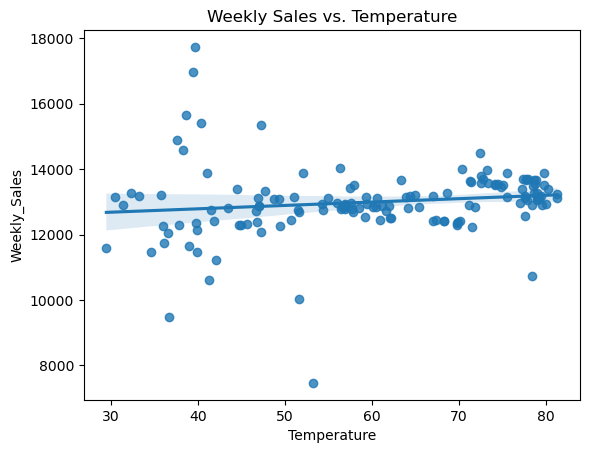

In [ ]:
sns.regplot(x='Temperature',y='Weekly_Sales',data=df_2).set(title='Weekly Sales vs. Temperature')

`Temperature (nhiệt độ)` dường như không phải là một yếu tố dự báo tốt về `Weekly_Sales (lượng bán hàng hóa hàng tuần)` vì đường hồi quy gần như nằm ngang.
- Các điểm dữ liệu khá rải rác ở phần đầu của đường thẳng, nhưng tập trung gần đường thẳng hơn ở phần sau (tương ứng từ khoảng giá trị "50" của biến Temperature trở đi). Điều này cho thấy Lượng bán hàng hóa sẽ biến động nhiều ở những ngày Nhiệt độ thấp hơn 50 (cụ thể biến động nhiều vào những ngày Nhiệt độ khoảng 40) và ổn định hơn ở những ngày Nhiệt độ cao hơn.
- Tuy nhiên vì đường hồi quy gần như nằm ngang nên không thể kết luận sự tăng/giảm của Nhiệt độ sẽ dẫn đến sự tăng/giảm của Lượng bán hàng hóa hàng tuần.

Vì vậy `Temperature (nhiệt độ)` không phải là một biến đáng tin cậy để dự đoán `Weekly_Sales (lượng bán hàng hóa hàng tuần)`.

Chúng ta có thể kiểm tra mối tương quan giữa `Temperature (nhiệt độ)` và `Weekly_Sales (lượng bán hàng hóa hàng tuần)` và thấy nó xấp xỉ 0.1421. Giá trị này cho thấy mối quan hệ tuyến tính yếu của 2 biến này.

[Text(0.5, 1.0, 'Weekly Sales vs. Fuel Price')]

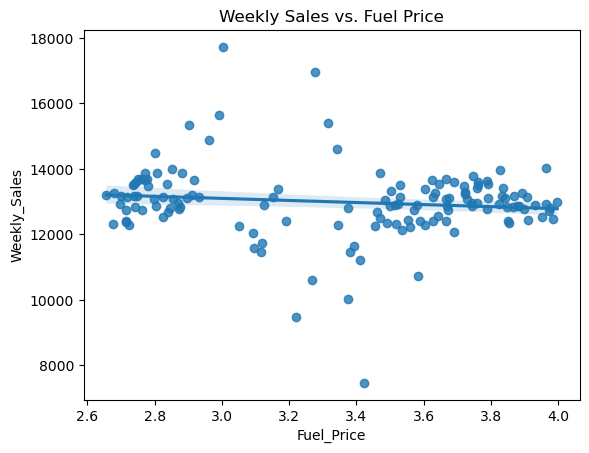

In [ ]:
sns.regplot(x='Fuel_Price',y='Weekly_Sales',data=df_2).set(title='Weekly Sales vs. Fuel Price')

`Fuel_Price (giá dầu)` dường như không phải là một yếu tố dự báo tốt về `Weekly_Sales (lượng bán hàng hóa hàng tuần)` vì đường hồi quy gần như nằm ngang.
- Các điểm dữ liệu tập trung nhiều vào phần đầu và cuối của đường hồi quy. Điều này có nghĩa là Lượng bán hàng hòa hàng tuần chủ yếu tập trung đến từ những mặt hàng dầu có giá rẻ dưới 3 hoặc đắt trên 3.4.
- Tuy nhiên không có xu hướng chung nào rõ ràng về sự tăng/giảm của 2 biến này.

Vì vậy `Fuel_Price (giá dầu)` không phải là một biến đáng tin cậy để dự đoán `Weekly_Sales (lượng bán hàng hóa hàng tuần)`.

Chúng ta có thể kiểm tra mối tương quan giữa `Fuel_Price (giá dầu)` và `Weekly_Sales (lượng bán hàng hóa hàng tuần)` và thấy nó xấp xỉ -0.1254. Giá trị này cho thấy mối quan hệ tuyến tính yếu của 2 biến này.

[Text(0.5, 1.0, 'Weekly Sales vs. CPI')]

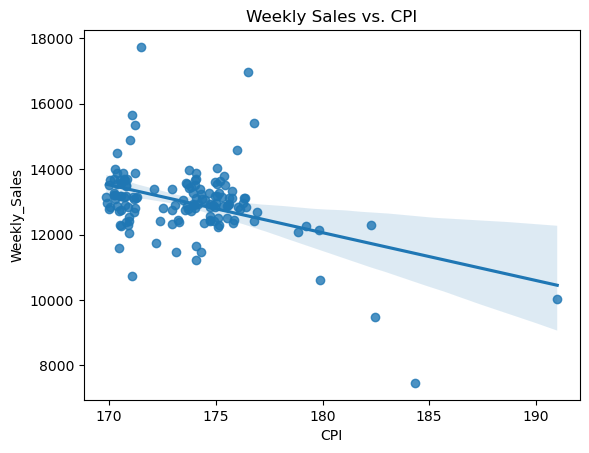

In [ ]:
sns.regplot(x='CPI',y='Weekly_Sales',data=df_2).set(title='Weekly Sales vs. CPI')

Chúng ta có thể thấy khi mà biến `CPI` càng tăng thì `Weekly_Sales (lượng bán hàng hóa hàng tuần)` càng giảm. Nó đồng nghĩa với việc có một mối tương quan nghịch biến giữa 2 biến này. Tuy nhiên, cần quan tâm rằng các điểm dữ liệu nằm chủ yếu ở khoảng giá trị từ 170-180 của biến CPI, nghĩa là lượng bán hàng hóa sẽ tập trung nhiều ở các giá trị CPI <180; CPI càng tăng thì Weekly_Sales càng giảm, tuy nhiên nếu vượt qua mức CPI khoảng 180 thì gần như không có nhiều hàng hóa được bán (các điểm dữ liệu rất thưa thớt).

Biến`CPI`có thể là một biến quan trọng để dự đoán `Weekly_Sales (lượng bán hàng hóa hàng tuần)` bởi vì đường hồi quy là một đường chéo, tuy nhiên cần quan tâm đến độ lớn của biến này để đưa ra dự đoán có ý nghĩa


Chúng ta có thể kiểm tra mối tương quan giữa `CPI` và `Weekly_Sales (lượng bán hàng hóa hàng tuần)` và thấy nó xấp xỉ -0.4141

[Text(0.5, 1.0, 'Weekly Sales vs. Unemployment')]

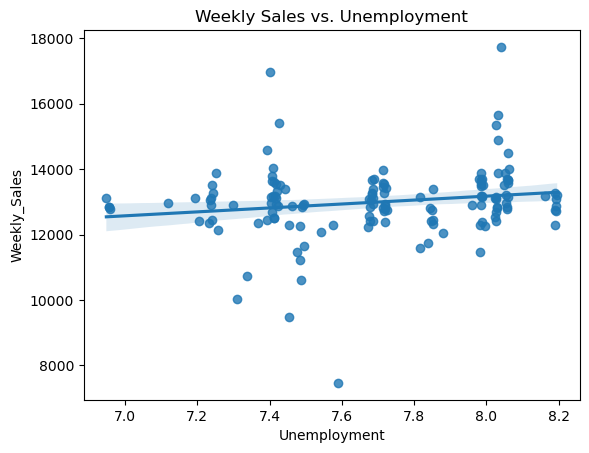

In [ ]:
sns.regplot(x='Unemployment',y='Weekly_Sales',data=df_2).set(title='Weekly Sales vs. Unemployment')

`Unemployment (Tỉ lệ thất nghiệp)` dường như không phải là một yếu tố dự báo tốt về `Weekly_Sales (lượng bán hàng hóa hàng tuần)` vì đường hồi quy gần như nằm ngang. Ngoài ra, các điểm dữ liệu khá rải rác và cách xa đường thẳng, cho thấy rất nhiều biến đổi. Vì vậy nó không phải là một biến đáng tin cậy để dự đoán `Weekly_Sales (lượng bán hàng hóa hàng tuần)`.

Chúng ta có thể kiểm tra mối tương quan giữa `Unemployment (Tỉ lệ thất nghiệp)` và `Weekly_Sales (lượng bán hàng hóa hàng tuần)` và thấy nó xấp xỉ 0.1752. Giá trị này cho thấy mối quan hệ tuyến tính yếu của 2 biến này.

[Text(0.5, 1.0, 'Weekly Sales vs. Size')]

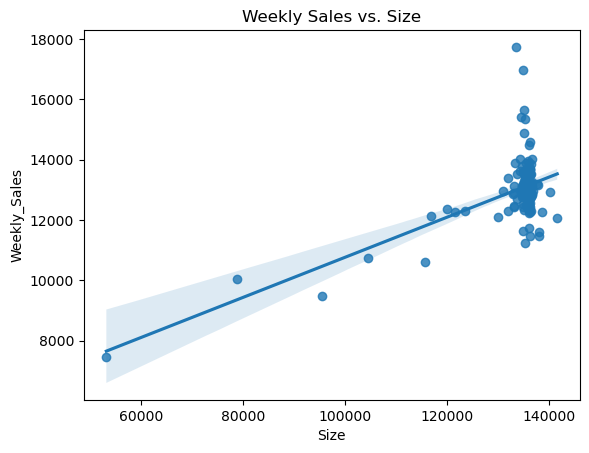

In [ ]:
sns.regplot(x='Size',y='Weekly_Sales',data=df_2).set(title='Weekly Sales vs. Size')

Chúng ta có thể thấy khi mà biến `Size (Size hàng hóa)` càng tăng thì `Weekly_Sales (Lượng bán hàng hóa hàng tuần)` càng cao. Nó đồng nghĩa với việc có một mối tương quan đồng biến giữa 2 biến này. Tuy nhiên, các điểm dữ liệu chủ yếu tập trung ở giá trị khoảng 140000 của biến "Size", nghĩa là chủ yếu hàng hóa bán ra thuộc kích cỡ này. Vậy nên ta có thể cân nhắc chỉ tăng thêm lượng hàng hóa ở Size này để tăng Weekly_Sales.

Biến `Size (Size hàng hóa)` có thể là một biến quan trọng để dự đoán `Lượng bán hàng hóa hàng tuần (Weekly_Sales)` bởi vì đường hồi quy gần là một đường chéo, tuy nhiên cần chú ý đến đặc điểm của các điểm dữ liệu như đã nói ở trên để đưa ra dự đoán có ý nghĩa.

</p>

Chúng ta có thể kiểm tra mối tương quan giữa `Size hàng hóa (Size)` và `Lượng bán hàng hóa hàng tuần (Weekly_Sales)` và thấy nó xấp xỉ 0.5949

[Text(0.5, 1.0, 'Weekly Sales vs. Total MarkDown')]

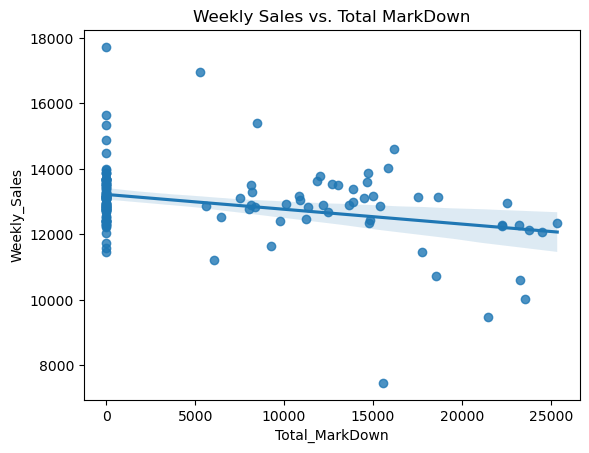

In [ ]:
sns.regplot(x='Total_MarkDown',y='Weekly_Sales',data=df_2).set(title='Weekly Sales vs. Total MarkDown')

`Total_Markdown (Tổng giảm giá)` dường như không phải là một yếu tố dự báo tốt về `Weekly_Sales (lượng bán hàng hóa hàng tuần)` vì đường hồi quy gần như nằm ngang. Ngoài ra, các điểm dữ liệu rất rải rác và cách xa đường thẳng, cho thấy rất nhiều biến đổi. Có khá nhiều điểm dữ liệu tập trung ở giá trị Total_Markdown = "0" là vì trong năm có nhiều hàng hóa bán ra không có giảm giá hơn so với lượng hàng bán với giảm giá. Điều này không có ý nghĩa nhiều trong việc dự đoán Sales.

Vì vậy `Total_Markdown (Tổng giảm giá)` không phải là một biến đáng tin cậy để dự đoán `Weekly_Sales (lượng bán hàng hóa hàng tuần)`.</p>

Chúng ta có thể kiểm tra mối tương quan giữa `Total_Markdown (Tổng giảm giá)` và `Weekly_Sales (lượng bán hàng hóa hàng tuần)` và thấy nó xấp xỉ -0.3149. Giá trị này cho thấy mối quan hệ tuyến tính yếu của 2 biến này.

## 2.4 Data Visualization

Ở phần Data Visualization, chúng em sẽ trực quan hoá dữ liệu, đồng thời đưa ra các insight để phân tích các biến độc lập ảnh hưởng đến phụ thuộc như thế nào.
Chúng em sử dụng 2 DataFrame như đã clean phía trên:
- DataFrame 1: 'df': chia data theo Store và Dept, 374273 rows × 20 columns
- DataFrame 2: 'df_2' chia data theo Date, 143 rowx x 16 columns

### a. Phân tích các biến CPI, Temparature, Fuel_Price, Unemployment
- Sử dụng DataFrame 2 vì các biến này biến động theo tuần, nếu sử dụng data theo ngày sẽ không nhìn tổng quan về sự thay đổi


In [ ]:
df_2.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
Date1,,,,,,,,,,,,,,,,,,
2010-02-05,22.393927,43.114263,13179.822833,0.0,33.275406,2.700768,170.800892,8.161107,137664.453855,2010.0,2.0,5.0,29685.589525,8230.358290,13096.416913,12308.597751,3543.489782,0.0
2010-02-12,21.989102,43.298008,13256.745641,1.0,32.333747,2.678407,170.249991,8.189948,136716.282976,2010.0,2.0,6.0,29747.314104,8352.830778,13236.142245,12462.475814,3531.657923,0.0
2010-02-19,22.039910,43.335323,13204.451503,0.0,35.790287,2.656191,170.230372,8.195977,136147.918314,2010.0,2.0,7.0,29796.714957,8241.306016,13099.642012,12315.501479,3548.410771,0.0
2010-02-26,22.014195,43.271573,12301.890347,0.0,37.802663,2.675833,170.515399,8.190962,136614.568920,2010.0,2.0,8.0,30661.807452,8618.664423,13615.233723,12823.640799,3624.789394,0.0
2010-03-05,22.058179,42.994711,12748.958644,0.0,41.552667,2.713657,170.572477,8.191097,136560.218738,2010.0,3.0,9.0,30121.400472,8325.154193,13236.800978,12445.497446,3586.677761,0.0


<b>Temperature

/var/folders/qj/8vx3pdcj7sd505b_9_kx9vqh0000gn/T/ipykernel_29785/409304096.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




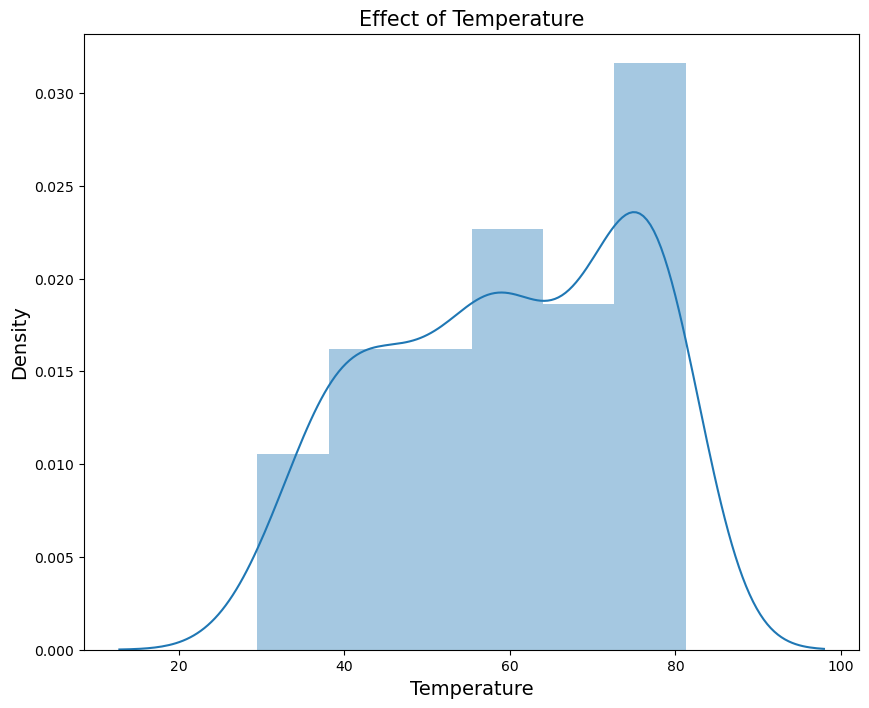

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(df_2['Temperature'])
plt.title('Effect of Temperature',fontsize=15)
plt.xlabel('Temperature',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.show()

<Axes: xlabel='Temperature'>

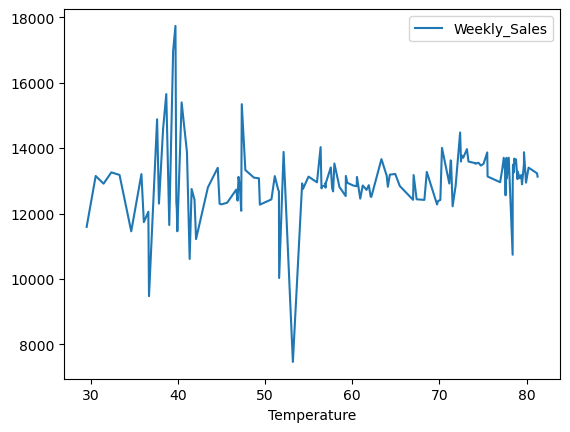

In [ ]:
temp = pd.pivot_table(df_2, values = "Weekly_Sales", index= "Temperature")
temp.plot()

<CPI>

<Axes: xlabel='CPI'>

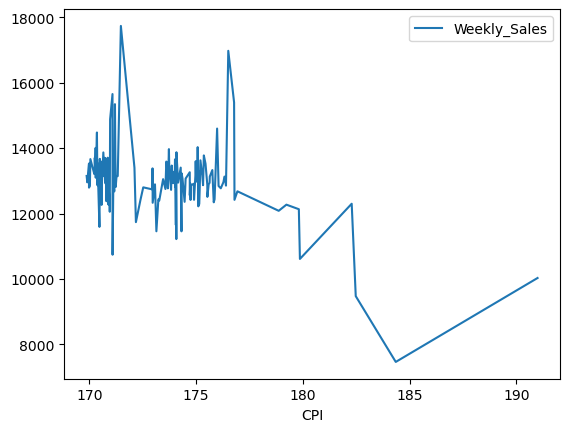

In [ ]:
CPI = pd.pivot_table(df_2, values = "Weekly_Sales", index= "CPI")
CPI.plot()

#### Nhận xét

- Từ biểu đồ, có thể thấy rằng có mối tương quan giữa CPI, nhiệt độ (Temperature), tỷ lệ thất nghiệp (Unemployment), giá nhiên liệu (Fuel Price) với doanh thu hàng tuần (Weekly Sale).
- Về CPI, khi CPI thuộc khoảng (170, 175), doanh thu hàng tuần có xu hướng thay đổi liên tục, song từ khoảng 180 trở đi, doanh thu hàng tuần có xu hướng giảm, mối tương quan âm.
- Tỷ lệ thất nghiệp (Unemployment) có mối tương quan nhẹ.
- Về nhiệt độ (Temperature), giá nhiên liệu (Fuel Price), mối tương quan của chúng với doanh thu hàng tuần vẫn có nhưng không quá rõ rệt.



#### Insight
<b>-Tương Quan Giữa CPI và Doanh Thu Hàng Tuần:<b>
<p>Inflation Impact: CPI (Chỉ số giá tiêu dùng) thường liên quan chặt chẽ đến tình hình lạm phát. Nếu có mối tương quan tiêu cực giữa CPI và doanh thu hàng tuần, điều này có thể chỉ ra rằng tăng trưởng lạm phát đang ảnh hưởng tiêu cực đến lựa chọn và chi tiêu của người tiêu dùng, dẫn đến giảm doanh thu.<p>
    
<b>- Ảnh Hưởng của Nhiệt Độ Đến Doanh Thu:<b>
    
<p>Thời Tiết: Nhiệt độ có thể là yếu tố không quá đáng kể trong các ngành như bán lẻ hoặc thực phẩm. Tác động của thời tiết nói chung và nhiệt độ nói riêng không ảnh hưởng quá nhiều đến người tiêu dùng. Điều này có thể chỉ ra rằng doanh nghiệp đã có xu hướng phát triển theo mô hình để không bị phụ thuộc vào thời tiết hoặc nhiệt độ.<p>
<b>- Tác Động Của Tỷ Lệ Thất Nghiệp:</b>
    
<p>Thu Nhập và Tiêu Dùng: Tỷ lệ thất nghiệp thường ảnh hưởng đến thu nhập của người tiêu dùng. Tuy nhiên, cho dù thất nghiệp hay không, người tiêu dùng vẫn cần mua sắm để duy trì cuộc sống của họ. Nếu có mối tương quan tiêu cực, có thể người tiêu dùng đang giảm chi tiêu do lo lắng về tình hình kinh tế không ổn định.<p>
    
<b>- Tác Động Của Giá Nhiên Liệu:<b>
    
<p>Chi Phí Vận Chuyển và Sản Xuất: Giá nhiên liệu thường liên quan chặt chẽ đến chi phí vận chuyển và sản xuất. Nếu có mối tương quan tiêu cực, có thể do chi phí vận chuyển và sản xuất tăng cao, làm giảm lợi nhuận và doanh thu.<p>


### b. Phân tích ảnh hướng của biến Holiday đến Weekly_Sales
Sử dụng DataFrame 1 vì các observations trong Weekly Sales biến động theo từng store và dept.

In [ ]:
df.head()

,Store,Dept,Date1,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
Date,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,0,42.31,2.572,211.096358,8.106,A,151315,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032,0.0
2010-02-05,17,74,2010-02-05,10218.96,0,23.11,2.666,126.442065,6.548,B,93188,2010,2,5,48049.95,9139.26,15300.776993,13364.35,6553.956954,0.0
2010-02-05,17,78,2010-02-05,1.00,0,23.11,2.666,126.442065,6.548,B,93188,2010,2,5,20.00,-19.76,2.605714,1.00,14.989764,0.0
2010-02-05,17,79,2010-02-05,31042.73,0,23.11,2.666,126.442065,6.548,B,93188,2010,2,5,32764.63,20802.76,27208.437622,27288.06,2097.747789,0.0
2010-02-05,17,80,2010-02-05,842.00,0,23.11,2.666,126.442065,6.548,B,93188,2010,2,5,1324.44,298.66,798.676713,822.91,214.316702,0.0


In [ ]:
df.rename(columns={'Date1':'Date'}, inplace=True)
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
Date,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,0,42.31,2.572,211.096358,8.106,A,151315,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032,0.00
2010-02-05,17,74,2010-02-05,10218.96,0,23.11,2.666,126.442065,6.548,B,93188,2010,2,5,48049.95,9139.26,15300.776993,13364.35,6553.956954,0.00
2010-02-05,17,78,2010-02-05,1.00,0,23.11,2.666,126.442065,6.548,B,93188,2010,2,5,20.00,-19.76,2.605714,1.00,14.989764,0.00
2010-02-05,17,79,2010-02-05,31042.73,0,23.11,2.666,126.442065,6.548,B,93188,2010,2,5,32764.63,20802.76,27208.437622,27288.06,2097.747789,0.00
2010-02-05,17,80,2010-02-05,842.00,0,23.11,2.666,126.442065,6.548,B,93188,2010,2,5,1324.44,298.66,798.676713,822.91,214.316702,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,5,36,2012-10-26,370.04,0,71.70,3.506,224.037814,5.422,B,34875,2012,10,43,2391.50,40.50,587.063706,495.00,443.674715,2281.40
2012-10-26,5,38,2012-10-26,56913.22,0,71.70,3.506,224.037814,5.422,B,34875,2012,10,43,75177.91,38694.59,55199.791888,54934.49,8034.328396,2281.40
2012-10-26,5,40,2012-10-26,19823.71,0,71.70,3.506,224.037814,5.422,B,34875,2012,10,43,23968.31,15786.74,19328.994965,19405.79,1604.766185,2281.40


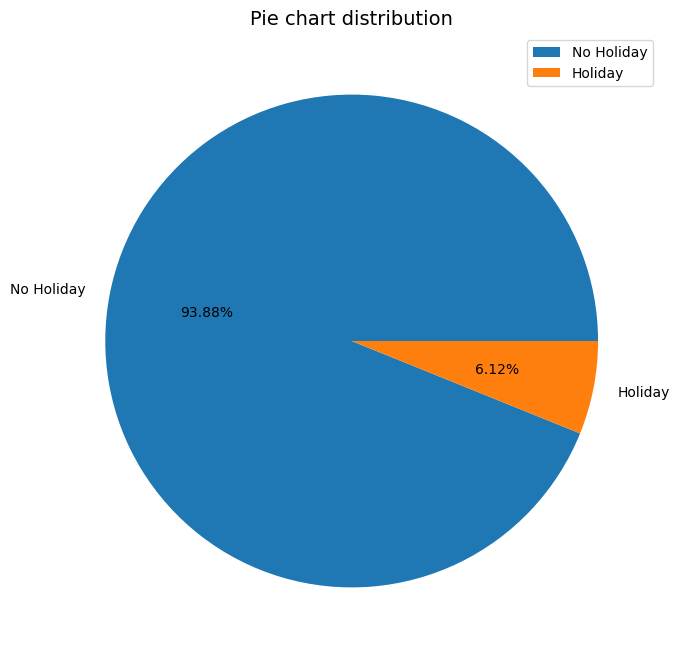

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(df['IsHoliday'].value_counts(),labels=['No Holiday','Holiday'],autopct='%0.2f%%')
plt.title("Pie chart distribution",fontsize=14)
plt.legend()
plt.show()

<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

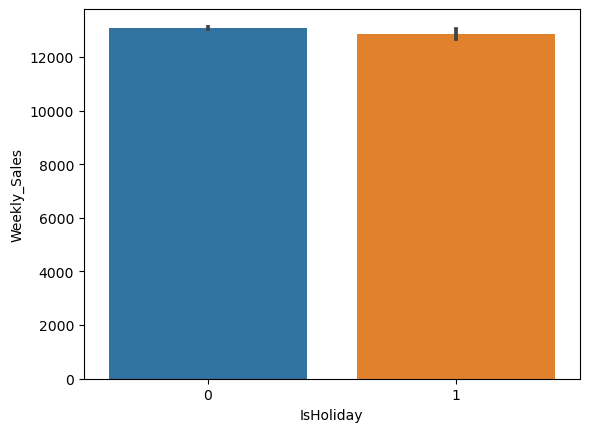

In [ ]:
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=df)

In [ ]:
df_holiday = df.loc[df['IsHoliday']==True]
df_holiday['Date'].unique()

array(['2010-02-12T00:00:00.000000000', '2010-09-10T00:00:00.000000000',
       '2010-11-26T00:00:00.000000000', '2010-12-31T00:00:00.000000000',
       '2011-02-11T00:00:00.000000000', '2011-09-09T00:00:00.000000000',
       '2011-11-25T00:00:00.000000000', '2011-12-30T00:00:00.000000000',
       '2012-02-10T00:00:00.000000000', '2012-09-07T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [ ]:
df_not_holiday = df.loc[df['IsHoliday']==False]
df_not_holiday['Date'].nunique()

133

#### Nhận xét:
- Có 4 ngày lễ như sau:
    - Super Bowl: 12-02-1010, 11-02-2011, 10-02-2012, 8-02-2013
    - Labor Day: 10-09-2010, 09-09-2011, 07-09-2012, 06-09-2013
    - Thanksgiving: 26-11-2010, 25-11-2011, 23-11-2012, 29-11-2013
    - Christmas: 31-12-2010, 30-12-2011, 28-12-2012, 27-12-2013
- Từ dữ liệu ta thấy, doanh số bán hàng trung bình hàng tuần cho các ngày lễ cao hơn đáng kể so với các ngày không phải là ngày lễ. Trong đó, có 133 tuần là tuần bình thường và 10 tuần chứa các ngày lễ.

Để xem xét sự khác biệt giữa về doanh số giữa các ngày lễ này, ta phân loại các ngày trong file dữ liệu vào 4 ngày lễ nêu trên.

In [ ]:
# Super bowl dates
df.loc[(df['Date'] == '2010-02-12')|(df['Date'] == '2011-02-11')|(df['Date'] == '2012-02-10'),'Super_Bowl'] = True
df.loc[(df['Date'] != '2010-02-12')&(df['Date'] != '2011-02-11')&(df['Date'] != '2012-02-10'),'Super_Bowl'] = False

In [ ]:
# Labor day dates
df.loc[(df['Date'] == '2010-09-10')|(df['Date'] == '2011-09-09')|(df['Date'] == '2012-09-07'),'Labor_Day'] = True
df.loc[(df['Date'] != '2010-09-10')&(df['Date'] != '2011-09-09')&(df['Date'] != '2012-09-07'),'Labor_Day'] = False

In [ ]:
# Thanksgiving dates
df.loc[(df['Date'] == '2010-11-26')|(df['Date'] == '2011-11-25'),'Thanksgiving'] = True
df.loc[(df['Date'] != '2010-11-26')&(df['Date'] != '2011-11-25'),'Thanksgiving'] = False

In [ ]:
#Christmas dates
df.loc[(df['Date'] == '2010-12-31')|(df['Date'] == '2011-12-30'),'Christmas'] = True
df.loc[(df['Date'] != '2010-12-31')&(df['Date'] != '2011-12-30'),'Christmas'] = False

<Axes: xlabel='Christmas', ylabel='Weekly_Sales'>

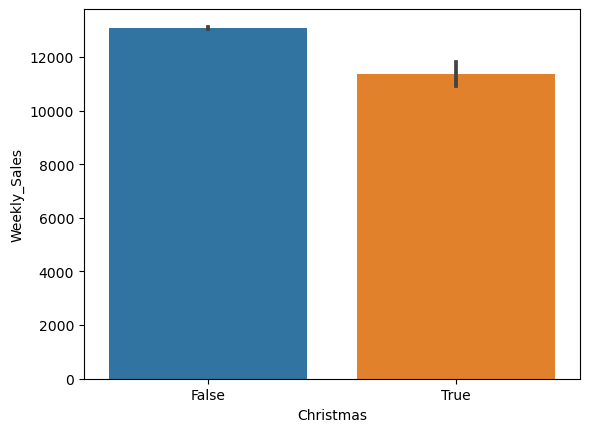

In [ ]:
sns.barplot(x='Christmas', y='Weekly_Sales', data=df) # Christmas holiday vs not-Christmas

<Axes: xlabel='Thanksgiving', ylabel='Weekly_Sales'>

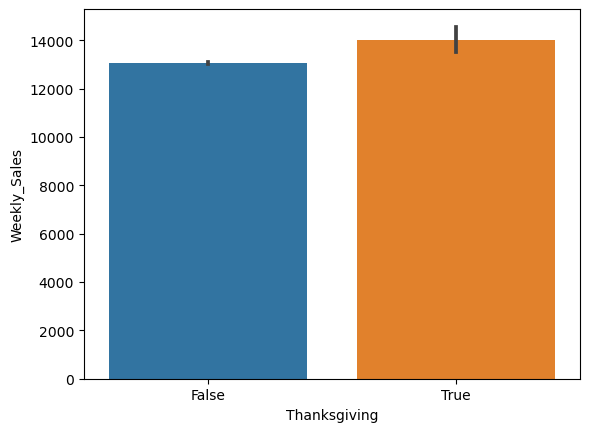

In [ ]:
sns.barplot(x='Thanksgiving', y='Weekly_Sales', data=df) # Thanksgiving holiday vs not-thanksgiving

<Axes: xlabel='Super_Bowl', ylabel='Weekly_Sales'>

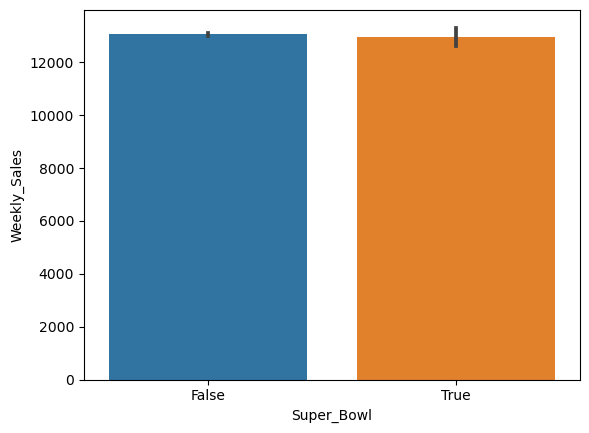

In [ ]:
sns.barplot(x='Super_Bowl', y='Weekly_Sales', data=df) # Super bowl holiday vs not-super bowl

<Axes: xlabel='Labor_Day', ylabel='Weekly_Sales'>

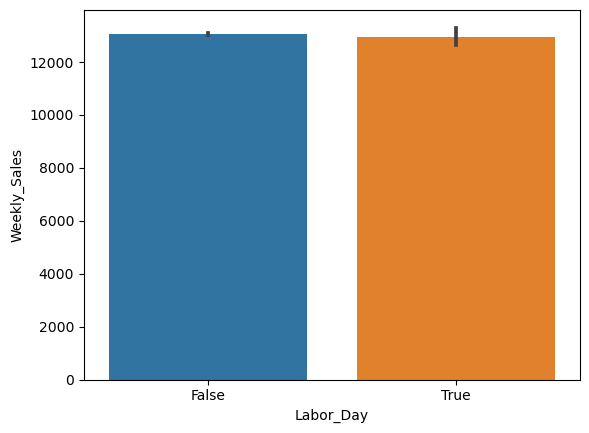

In [ ]:
sns.barplot(x='Labor_Day', y='Weekly_Sales', data=df) # Labor day holiday vs not-labor day

#### Nhận xét:
- Labour Day và Christmas không làm tăng doanh số bán hàng trung bình hàng tuần.
- Dịp lễ Super Bowl có tác động tích cực đến doanh số bán hàng.
- Mức chênh lệch cao nhất được nhận thấy ở dịp Thanksgiving.

#### Insight:
- Mọi người thường thích mua quà trước Christmas 1-2 tuần nên doanh số bán hàng trong tuần lễ Giáng sinh không thay đổi.
- Trong tuần Lễ Tạ ơn, nên tiếp tục có đợt giảm giá Black Friday.

### Type Effect on Holidays
Có 3 loại cửa hàng trong tập dữ liệu, bao gồm cửa hàng loại A, B và C.

In [ ]:
df.groupby(['Christmas','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Christmas

Christmas  Type
False      A       15466.248885
           B       11048.275876
           C        9066.953064
True       A       13779.825019
           B        9412.094021
           C        8469.373580
Name: Weekly_Sales, dtype: float64

In [ ]:
df.groupby(['Labor_Day','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Labor Day

Labor_Day  Type
False      A       15456.186879
           B       11031.645694
           C        9055.886208
True       A       15171.944235
           B       11025.415888
           C        9208.878355
Name: Weekly_Sales, dtype: float64

In [ ]:
df.groupby(['Thanksgiving','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Thanksgiving

Thanksgiving  Type
False         A       15434.122770
              B       11020.342907
              C        9063.808385
True          A       17351.858852
              B       12179.337974
              C        8704.145579
Name: Weekly_Sales, dtype: float64

In [ ]:
df.groupby(['Super_Bowl','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Super Bowl

Super_Bowl  Type
False       A       15453.980848
            B       11031.250398
            C        9051.896786
True        A       15246.205618
            B       11044.233409
            C        9397.270531
Name: Weekly_Sales, dtype: float64

In [ ]:
df.groupby('IsHoliday')['Weekly_Sales'].mean()

IsHoliday
0    13072.270941
1    12850.402121
Name: Weekly_Sales, dtype: float64

/var/folders/qj/8vx3pdcj7sd505b_9_kx9vqh0000gn/T/ipykernel_29785/2621990641.py:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



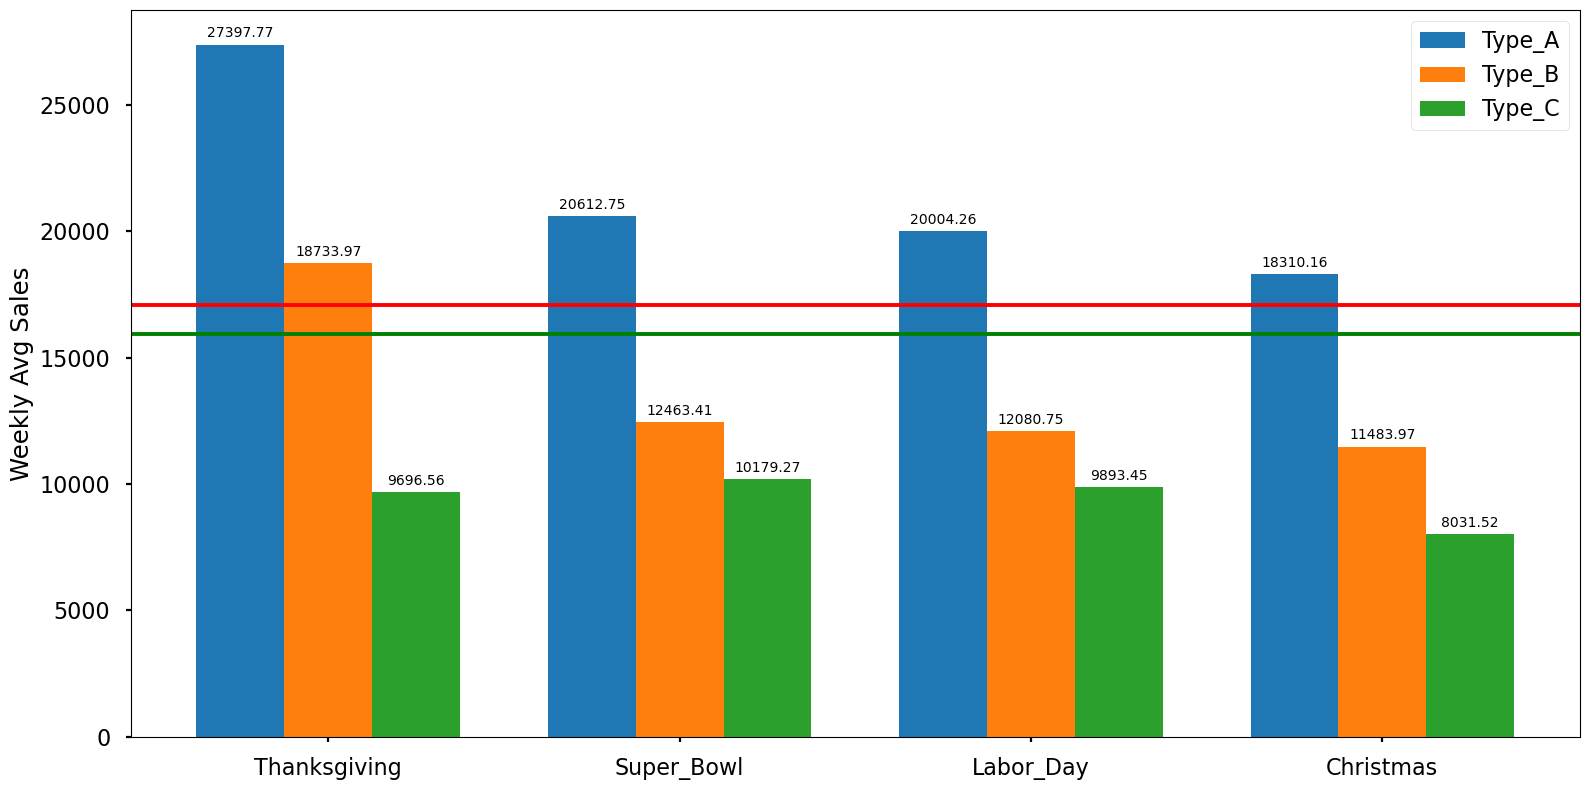

In [ ]:
# Plotting avg wekkly sales according to holidays by types
plt.style.use('seaborn-poster')
labels = ['Thanksgiving', 'Super_Bowl', 'Labor_Day', 'Christmas']
A_means = [27397.77, 20612.75, 20004.26, 18310.16]
B_means = [18733.97, 12463.41, 12080.75, 11483.97]
C_means = [9696.56,10179.27,9893.45,8031.52]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x - width, A_means, width, label='Type_A')
rects2 = ax.bar(x , B_means, width, label='Type_B')
rects3 = ax.bar(x + width, C_means, width, label='Type_C')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Weekly Avg Sales')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.axhline(y=17094.30,color='r') # holidays avg
plt.axhline(y=15952.82,color='green') # not-holiday avg

fig.tight_layout()

plt.show()

In [ ]:
df.sort_values(by='Weekly_Sales',ascending=False).head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,...,max,min,mean,median,std,Total_MarkDown,Super_Bowl,Labor_Day,Thanksgiving,Christmas
Date,,,,,,,,,,,,,,,,,,,,,
2011-04-08,19,90,2011-04-08,72756.18,0,41.26,3.895,134.177774,7.658,A,...,96173.32,56655.89,67545.406434,66642.72,6137.880296,0.00,False,False,False,False
2012-03-30,4,72,2012-03-30,72752.83,0,72.63,3.820,130.967097,4.607,A,...,385051.04,59462.12,101244.450839,88461.13,47323.714827,7579.16,False,False,False,False
2011-08-12,2,94,2011-08-12,72752.41,0,91.58,3.638,215.259321,7.852,A,...,96765.32,51699.33,70018.672517,70445.94,7259.141740,0.00,False,False,False,False
2010-10-01,14,40,2010-10-01,72751.70,0,70.58,2.707,182.716838,8.724,A,...,95341.80,54033.88,72356.461049,73186.25,6878.502684,0.00,False,False,False,False
2011-05-13,34,95,2011-05-13,72750.57,0,63.05,3.872,129.089000,10.581,A,...,81871.02,57296.98,69245.187972,69687.19,5249.239655,0.00,False,False,False,False


#### Nhận xét
- Có ba loại cửa hàng khác nhau trong dữ liệu là A, B và C.
- Từ biểu đồ cho thấy, doanh số bán hàng trung bình cao nhất rơi vào tuần Thanksgiving (lễ Tạ ơn) so với các ngày lễ khác.
- Trong tất cả các ngày lễ, các cửa hàng Loại A có doanh thu cao nhất.

#### Insight
- Phân loại cửa hàng
Dữ liệu chia thành ba loại cửa hàng: A, B và C. Việc này có thể phản ánh sự đa dạng trong dữ liệu và nhu cầu quản lý khác nhau giữa các loại cửa hàng.
- Các cửa hàng Loại A có doanh thu cao nhất trong các ngày lễ
Trong tất cả các ngày lễ, các cửa hàng thuộc loại A đều có doanh thu cao nhất. Điều này có thể là do một số yếu tố như vị trí, sản phẩm, hoặc chiến lược quảng cáo đặc biệt áp dụng cho loại cửa hàng này.
- Chiến lược tập trung vào ngày lễ và loại cửa hàng A
Với doanh số bán hàng cao nhất trong các ngày lễ và đặc biệt là vào tuần Thanksgiving, có thể đề xuất chiến lược tập trung nâng cao chất lượng dịch vụ và cung cấp ưu đãi đặc biệt cho cửa hàng Loại A trong những thời kỳ này để tối đa hóa doanh thu.
- Cần phân tích chi tiết hơn
Mặc dù đã có các nhận xét quan trọng, để hiểu rõ hơn về sự thành công của loại cửa hàng A và tại sao tuần Thanksgiving có doanh số bán hàng cao nhất, cần thực hiện các phân tích chi tiết hơn về yếu tố ảnh hưởng.



### c. Size - Type Relation

In [ ]:
df.groupby('Type').describe()['Size'].round(2) # See the Size-Type relation

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
A,188222.0,179755.31,43388.51,39690.0,155083.0,202307.0,203819.0,219622.0
B,149027.0,101019.65,31825.73,34875.0,93188.0,114533.0,123737.0,140167.0
C,36998.0,40652.55,1233.18,39690.0,39910.0,39910.0,41062.0,42988.0


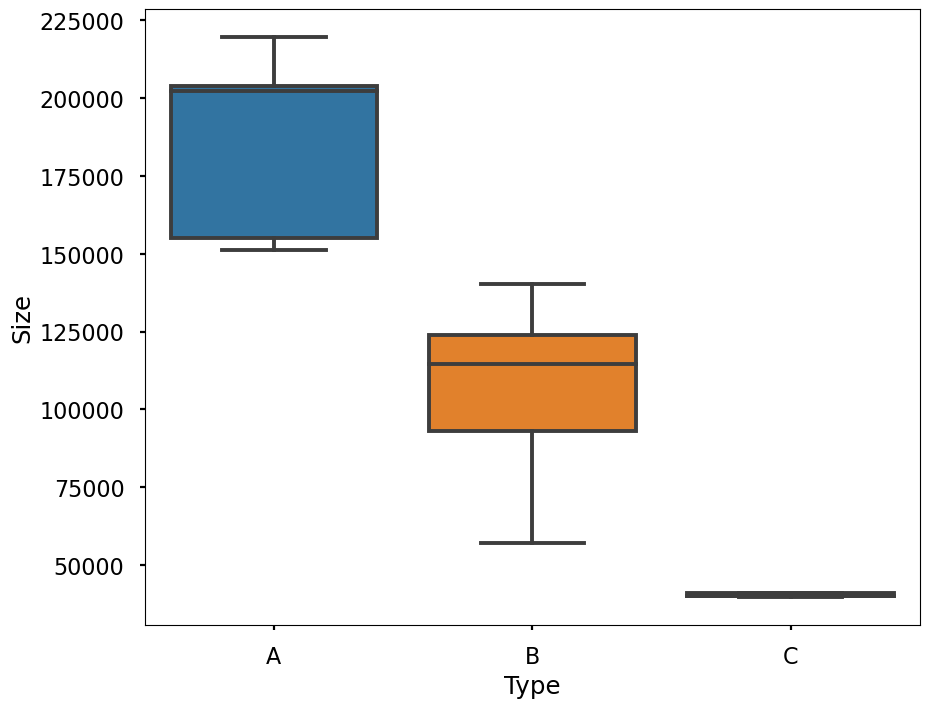

In [ ]:
plt.figure(figsize=(10,8)) # To see the type-size relation
fig = sns.boxplot(x='Type', y='Size', data=df, showfliers=False)

#### Nhận xét
- Quy mô của các loại hình cửa hàng phù hợp với doanh số bán hàng như mong đợi. Cửa hàng có quy mô lớn hơn có doanh thu cao hơn. Walmart phân loại các cửa hàng theo quy mô của chúng theo biểu đồ lần lượt theo Loại A, Loại B và Loại C.
- Biểu đồ cho thấy rằng có một mối quan hệ tích cực giữa quy mô cửa hàng và doanh số bán hàng theo loại. Điều này có nghĩa là cửa hàng có diện tích bán hàng lớn hơn có xu hướng có doanh số bán hàng cao hơn cho tất cả các loại sản phẩm.
- Tuy nhiên, có một số điểm khác biệt đáng chú ý giữa các loại sản phẩm.
    - Loại A có mối quan hệ tích cực mạnh nhất giữa quy mô cửa hàng và doanh số bán hàng. Điều này có nghĩa là cửa hàng có diện tích bán hàng lớn hơn có xu hướng có doanh số bán hàng cao hơn đáng kể cho loại sản phẩm này.
    - Loại B có mối quan hệ tích cực trung bình giữa quy mô cửa hàng và doanh số bán hàng. Điều này có nghĩa là cửa hàng có diện tích bán hàng lớn hơn có xu hướng có doanh số bán hàng cao hơn một chút cho loại sản phẩm này.
    - Loại C có mối quan hệ tích cực yếu nhất giữa quy mô cửa hàng và doanh số bán hàng. Điều này có nghĩa là cửa hàng có diện tích bán hàng lớn hơn không có xu hướng có doanh số bán hàng cao hơn đáng kể cho loại sản phẩm này.
#### Insight
Dựa trên dữ liệu trong biểu đồ, có thể rút ra một số insight sau:

- Walmart có thể sử dụng dữ liệu này để xác định các loại sản phẩm có thể được hưởng lợi từ việc mở rộng cửa hàng.
- Walmart có thể sử dụng dữ liệu này để phân bổ nguồn lực của mình một cách hiệu quả hơn giữa các cửa hàng khác nhau.
- Tứ phân vị thứ ba (Q3) của biểu đồ thể hiện giá trị cao thứ ba trong tập dữ liệu. Trong trường hợp này, Q3 của loại A cao hơn Q3 của loại B và loại C. Điều này cho thấy rằng giá trị cao nhất của loại A cao hơn giá trị cao nhất của loại B và loại C.
- Những insight này có thể được sử dụng bởi Walmart để hiểu rõ hơn về cách thức phân bố dữ liệu doanh số bán hàng của mình theo quy mô cửa hàng và loại sản phẩm. Dữ liệu này có thể được sử dụng để cải thiện chiến lược kinh doanh của Walmart bằng cách nhắm mục tiêu đến các nhóm cửa hàng và khách hàng cụ thể.
- Một số ví dụ cụ thể: Dựa trên dữ liệu trong biểu đồ, Walmart có thể đưa ra một số quyết định cụ thể sau:
    - Walmart có thể mở rộng các cửa hàng hiện có của mình để tăng doanh số bán hàng cho loại A.
    - Walmart có thể mở rộng các cửa hàng mới của mình ở các khu vực có nhu cầu cao về loại B.
    - Walmart có thể tập trung vào việc tiếp thị và quảng bá loại C trong các cửa hàng nhỏ hơn.


### d. Phân tích ảnh hưởng của biến MarkDown đến Weekly Sales

<Axes: xlabel='Total_MarkDown'>

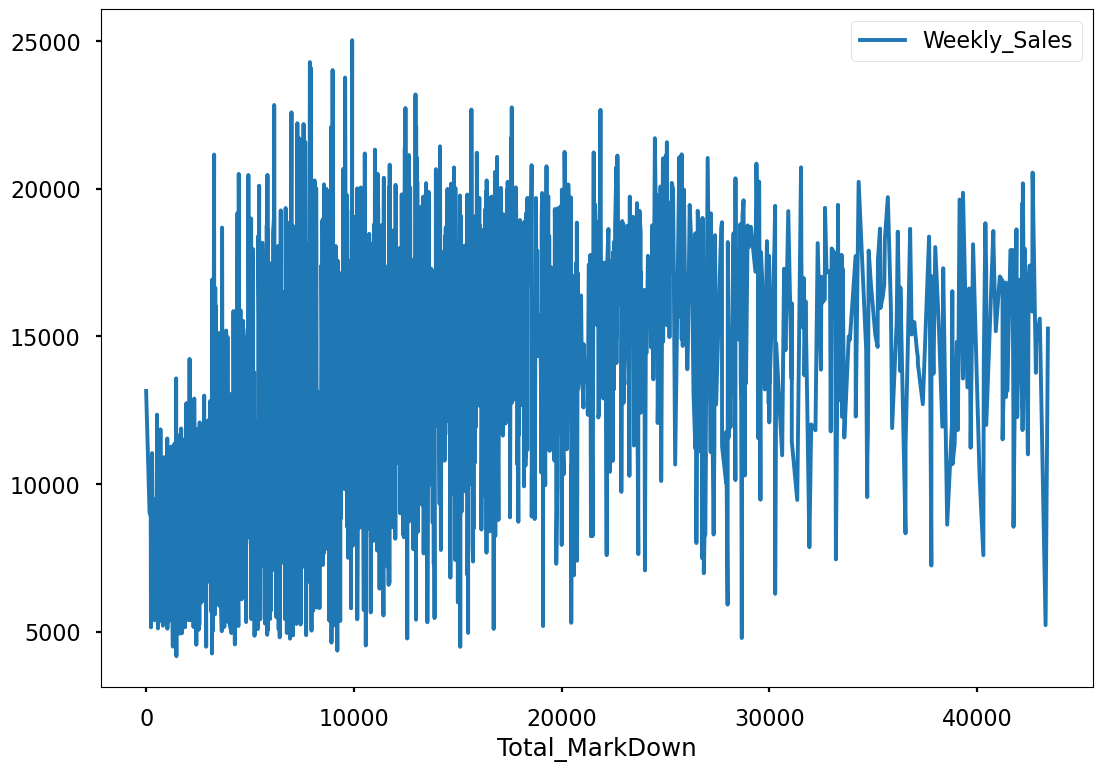

In [ ]:
Total_MarkDown = pd.pivot_table(df, values = "Weekly_Sales", index= "Total_MarkDown")
Total_MarkDown.plot()

#### Nhận xét
<p>Mối tương quan giữa Weekly Sale và Total Markdown không quá rõ rệt. Weekly sale và Total Markdown đều có xu hướng tăng giảm thất thường. Có một số lý do có thể giải thích cho mối tương quan không rõ rệt này:<p>

- Sự biến động của thị trường: Thị trường có thể thay đổi theo thời gian, dẫn đến nhu cầu của khách hàng thay đổi. Nếu nhu cầu tăng, doanh số bán hàng sẽ tăng, nhưng tổng chiết khấu có thể giảm. Ngược lại, nếu nhu cầu giảm, doanh số bán hàng sẽ giảm, nhưng tổng chiết khấu có thể tăng.
- Chính sách chiết khấu của doanh nghiệp: Doanh nghiệp có thể áp dụng các chính sách chiết khấu khác nhau cho các sản phẩm khác nhau. Ví dụ, một sản phẩm mới ra mắt có thể được chiết khấu mạnh hơn để thu hút khách hàng. Ngược lại, một sản phẩm đang bán chậm có thể được chiết khấu ít hơn để giảm thiểu thiệt hại.
- Các yếu tố khác: Các yếu tố khác như cạnh tranh, giá cả của các sản phẩm tương tự cũng có thể ảnh hưởng đến doanh số bán hàng và tổng chiết khấu.

#### Insight
- Doanh nghiệp cần theo dõi chặt chẽ nhu cầu của thị trường và điều chỉnh chính sách chiết khấu cho phù hợp.
- Doanh nghiệp cần có các biện pháp để giảm thiểu biến động của doanh số bán hàng và tổng chiết khấu.
- Cụ thể, doanh nghiệp có thể thực hiện các biện pháp sau:
    - Tăng cường nghiên cứu thị trường để dự đoán nhu cầu của khách hàng.
    - Áp dụng các chính sách chiết khấu linh hoạt, phù hợp với từng sản phẩm và từng thời điểm.
    - Đầu tư vào các hoạt động marketing để quảng bá sản phẩm và thu hút khách hàng.
    - Tăng cường chất lượng sản phẩm và dịch vụ để nâng cao lòng trung thành của khách hàng.


### e. Phân tích Weekly Sales tại các Store và Department

In [ ]:
df['Store'].nunique() # number of different values

45

In [ ]:
df['Dept'].nunique() # number of different values

81

Ta sẽ xem xét doanh số bán hàng trung bình hàng tuần của từng cửa hàng (Store) và từng bộ phận (Department) để xem liệu có giá trị kỳ lạ nào hay không. Có 45 cửa hàng (Store) và 81 bộ phận (Department).

In [ ]:
store_dept_table = pd.pivot_table(df, index='Store', columns='Dept',values='Weekly_Sales', aggfunc=np.mean)
display(store_dept_table)

Dept,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,
1,22571.675507,46003.221667,13102.518696,36825.351667,23301.622920,4727.566350,22011.077407,35663.563116,28041.599348,30981.120652,...,70360.583750,63361.908095,NaN,64536.084667,62044.433307,NaN,33063.686325,35292.886449,11775.799275,251.417812
2,29102.891145,65218.823846,17521.277353,45442.042794,27168.747634,6765.621176,32506.888661,58435.438284,34468.969191,38834.538162,...,NaN,69404.815000,NaN,65350.088182,66500.369022,NaN,34197.310294,40770.478235,14030.227059,469.074848
3,7328.621049,16841.775664,5509.300769,8434.186503,11695.366573,2012.411818,10044.341608,8310.254196,9062.007692,10871.944126,...,1540.049161,318.685594,7568.280210,NaN,656.294444,15745.528252,3934.540000,343.437357,30.570833,NaN
4,33593.668810,NaN,17396.589545,56339.287630,40641.369219,8149.734148,41401.301667,62693.290226,34513.693185,37195.898519,...,72140.235000,65700.885656,NaN,63880.420990,64616.757320,NaN,38020.572370,39401.249926,14922.212519,575.807500
5,9774.553077,12317.953287,4101.085175,9860.806783,6699.202238,1200.158451,6124.484336,13735.709441,7919.805944,9783.395385,...,3059.520000,1457.221678,7759.205594,NaN,417.101781,19340.693986,5985.671119,667.070315,31.609545,NaN
6,23915.859424,50006.924493,16690.140719,34098.230504,31779.079259,7131.157194,29039.925985,47530.757266,45653.915039,47381.551223,...,53137.308175,45305.670791,NaN,41282.227338,41660.048058,70897.542000,30400.760504,20652.630504,9674.785540,355.707500
7,9441.382154,22335.014462,8596.689462,14781.040923,13443.828385,6275.784692,10865.778077,13896.345077,30775.813769,20861.842462,...,13396.880692,9880.719615,25952.533538,1303.468769,728.059903,33754.294077,1047.916462,4254.337846,268.925625,NaN
8,14845.630857,35703.855071,10678.998429,21021.593143,19149.807842,3359.263286,18271.968905,26415.798786,11768.309857,20680.289714,...,39253.778143,31533.984571,59069.606336,27432.913929,25468.543714,62934.145180,16.986667,17000.913214,6836.522929,225.791250
9,11843.229930,24981.961197,7501.346549,17146.247606,18988.828592,2715.899437,13622.716479,21429.386831,13150.203873,12814.976690,...,2972.520493,868.916479,14069.155000,21.240000,606.493836,29600.291056,3589.169366,420.477500,27.605833,NaN


Nhận xét:
- Store Numbers từ 1 đến 45, Department Numbers từ 1 đến 99. Tổng số cửa hàng (Department Numbers) là 81.
- Từ bảng tổng hợp (pivot table), ta có thấy một số giá trị sai, chẳng hạn như ghi nhận giá trị 0 và âm cho doanh số bán hàng hàng tuần. Nhưng số tiền bán hàng không thể bị âm. Vì vậy, ta sẽ thay đổi giá trị này.

In [ ]:
df.loc[df['Weekly_Sales']<=0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,...,max,min,mean,median,std,Total_MarkDown,Super_Bowl,Labor_Day,Thanksgiving,Christmas
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,20,19,2010-02-05,0.0,0,25.92,2.784,204.247194,8.187,A,...,1485.00,-69.56,162.158929,41.00,288.965401,0.00,False,False,False,False
2010-02-05,11,19,2010-02-05,0.0,0,46.04,2.572,214.424881,7.368,A,...,2631.28,-9.94,1435.587073,1625.65,717.682929,0.00,False,False,False,False
2010-02-19,10,47,2010-02-19,0.0,0,58.22,2.915,126.526286,9.765,B,...,598.00,-798.00,-64.694444,-26.50,357.180292,0.00,False,False,False,False
2010-02-26,21,98,2010-02-26,0.0,0,45.31,2.561,210.975957,8.324,B,...,1449.91,-10.21,111.680672,57.88,174.300152,0.00,False,False,False,False
2010-02-26,33,25,2010-02-26,0.0,0,56.50,2.825,126.552286,10.115,A,...,211.50,0.00,34.633958,21.50,39.062311,0.00,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-08-17,3,36,2012-08-17,0.0,0,87.36,3.571,225.555866,6.334,B,...,2165.00,0.00,622.689371,455.00,489.119714,1866.43,False,False,False,False
2012-08-17,31,54,2012-08-17,0.0,0,85.55,3.571,221.675146,6.565,A,...,453.00,-28.92,84.190153,56.88,87.939710,10539.98,False,False,False,False
2012-08-24,27,47,2012-08-24,0.0,0,72.93,3.997,142.310593,8.239,A,...,425.00,-409.00,5.826087,0.00,159.336095,16516.76,False,False,False,False


Nhận xét:
- 67 hàng trong 374273 hàng có nghĩa là 0,01%, vì vậy ta có thể xóa và bỏ qua những hàng chứa giá trị bán hàng sai này.

In [ ]:
df = df.loc[df['Weekly_Sales'] > 0]

In [ ]:
df.shape # new data shape

(374180, 24)

#### Insights:
- Giá trị Bán hàng âm và bằng 0
    - Dữ liệu có giá trị bán hàng âm và bằng 0 trong bảng tổng hợp. Điều này là không thể trong thực tế doanh nghiệp, vì vậy cần kiểm tra và chỉnh sửa những giá trị này.
    - Thay đổi giá trị âm thành 0 và xác nhận rằng không có giá trị bán hàng bằng 0 trong thực tế. Nếu có, cần xác định nguyên nhân và điều chỉnh dữ liệu nếu cần.
    - Số lượng hàng có giá trị bán hàng sai
- 67 hàng (0.01% tổng số hàng)
    - Có giá trị bán hàng không hợp lý, cần đề xuất xóa chúng. Nếu chúng không mang lại ý nghĩa hoặc có thể là do lỗi nhập liệu, việc xóa chúng có thể cải thiện chất lượng dữ liệu.
    - Chấp nhận chuyện không có bán hàng trong tuần
- Ghi nhận giá trị doanh số bằng 0
    - Điều này có thể xảy ra trong một số trường hợp, ví dụ như nghỉ lễ hoặc bảo trì. Tùy thuộc vào ngữ cảnh doanh nghiệp, có thể quyết định giữ lại thông tin này hoặc thay thế giá trị bán hàng bằng 0.
- Kiểm tra và làm sạch dữ liệu
    - Trước khi thực hiện các thay đổi, cần kiểm tra kỹ lưỡng dữ liệu để đảm bảo rằng các thay đổi không gây ra sự mất mát thông tin quan trọng.
    - Làm sạch dữ liệu cần được thực hiện cẩn thận để tránh tình trạng lệch lạc hoặc mất dữ liệu quan trọng.
- Kiểm tra các biểu đồ và bảng tổng hợp khác
    - Để đảm bảo tính nhất quán và độ tin cậy của dữ liệu, kiểm tra các biểu đồ và bảng tổng hợp khác để đảm bảo rằng không có vấn đề nào khác xuất hiện sau khi thực hiện các điều chỉnh.
- Ghi chú và báo cáo
    - Sau khi thực hiện các điều chỉnh, là quan trọng để tạo ghi chú và báo cáo về các thay đổi. Điều này giúp tăng cường sự hiểu biết của người sử dụng dữ liệu về quá trình làm sạch và cải thiện dữ liệu.

<b> Average Monthly Sale

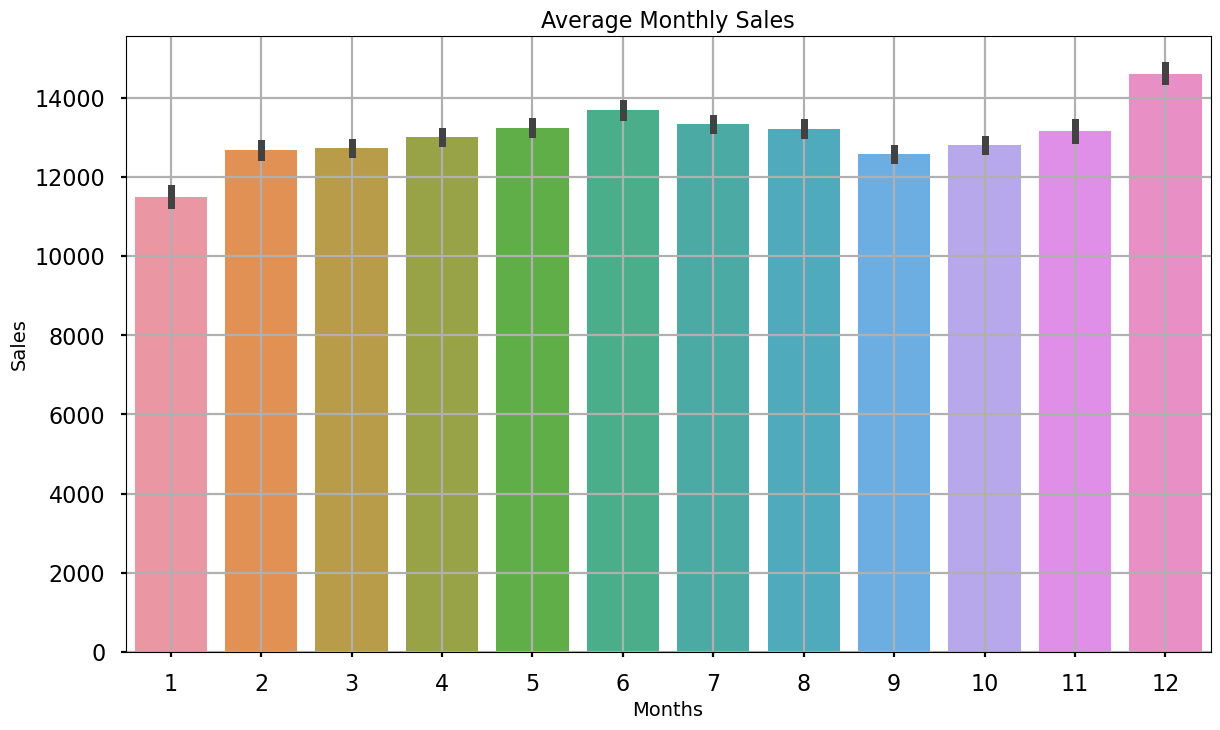

In [ ]:
plt.figure(figsize=(14,8))
sns.barplot(x='Month',y='Weekly_Sales',data=df)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Months',fontsize=14)
plt.title('Average Monthly Sales',fontsize=16)
plt.grid()

<b>Nhận xét
<p>Biểu đồ này cho thấy doanh số bán hàng hàng tuần của 45 cửa hàng ở Hoa Kỳ. Doanh số bán hàng nói chung tăng dần theo thời gian, với mức tăng lớn nhất xảy ra vào cuối năm. Điều này có thể được giải thích bởi việc mua sắm trong dịp lễ Giáng sinh.<p>

<b>Insights
    
<p>-Doanh số bán hàng của các cửa hàng ở Hoa Kỳ có xu hướng tăng vào cuối năm. Điều này có thể được ứng dụng trong các lĩnh vực sau:<p>

    - Marketing: Các nhà tiếp thị có thể sử dụng thông tin này để phát triển các chiến dịch tiếp thị tập trung vào dịp lễ Giáng sinh.
    - Quản lý chuỗi cung ứng: Các nhà quản lý chuỗi cung ứng có thể sử dụng thông tin này để đảm bảo rằng họ có đủ hàng tồn kho để đáp ứng nhu cầu tăng cao vào cuối năm.
    - Lập kế hoạch tài chính: Các doanh nghiệp có thể sử dụng thông tin này để lập kế hoạch tài chính của họ cho cuối năm.
<p>- Ngoài insight đã nêu ở trên, biểu đồ này còn cho thấy rằng có sự khác biệt về doanh số bán hàng giữa các cửa hàng. Một số cửa hàng có doanh số bán hàng cao hơn nhiều so với các cửa hàng khác. Điều này có thể là do một số yếu tố, chẳng hạn như vị trí, loại sản phẩm được bán, và chiến lược marketing.<p>


<b>Monthly Sales for Each Year

In [ ]:
data_monthly = pd.crosstab(df["Year"], df["Month"], values=df["Weekly_Sales"],aggfunc='sum')
data_monthly

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2010,NaN,1.365986e+08,1.369976e+08,1.753251e+08,1.422677e+08,1.455770e+08,1.776954e+08,1.426176e+08,1.344151e+08,1.687452e+08,1.440445e+08,1.927286e+08
2011,1.170809e+08,1.320987e+08,1.341586e+08,1.710181e+08,1.382097e+08,1.441182e+08,1.762046e+08,1.398143e+08,1.668033e+08,1.375280e+08,1.034907e+08,1.597524e+08
2012,1.172222e+08,8.915290e+07,1.734250e+08,1.479222e+08,1.512280e+08,1.902330e+08,1.458221e+08,1.636039e+08,1.432228e+08,1.480537e+08,NaN,NaN


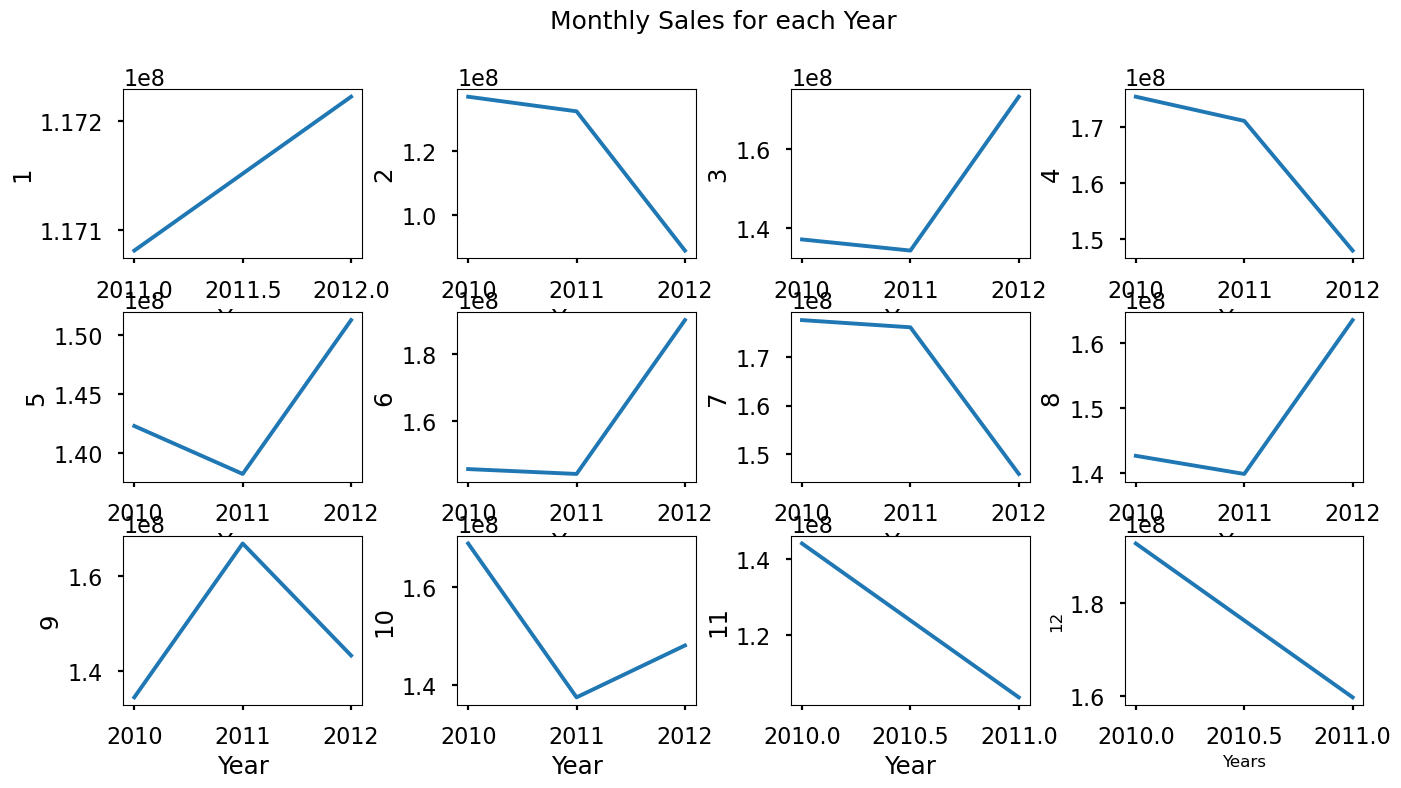

In [ ]:
fig, axes = plt.subplots(3,4,figsize=(16,8))
plt.suptitle('Monthly Sales for each Year', fontsize=18)
k=1
for i in range(3):
    for j in range(4):
      sns.lineplot(ax=axes[i,j],data=data_monthly[k])
      plt.subplots_adjust(wspace=0.4,hspace=0.32)
      plt.ylabel(k,fontsize=12)
      plt.xlabel('Years',fontsize=12)
      k+=1
plt.show()

#### Weekly Sales by Department

In [ ]:
df_grouping_dept=df.groupby("Dept",as_index=False).mean(numeric_only=True)
df_grouping_dept

,Dept,Store,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
0,1,23.075804,18125.426377,0.062286,61.005903,3.351487,174.210409,7.726721,128961.732033,2010.969541,6.425565,25.734086,60856.632211,10700.377462,18989.527412,15447.177230,9343.690735,4544.362724
1,2,24.198279,35814.425065,0.063942,60.478021,3.340692,177.387997,7.745081,121383.733281,2010.967736,6.401447,25.634924,54883.020823,27021.245901,36292.797302,35840.450448,3849.705041,4210.719836
2,3,22.980622,11118.837296,0.061533,60.667838,3.350561,174.047273,7.723279,129408.093490,2010.965154,6.429883,25.746898,48774.398135,5627.668113,11626.284084,8462.278117,8375.510944,4538.762424
3,4,22.949401,25886.035674,0.061562,60.809764,3.351940,173.855076,7.722075,129708.350818,2010.966605,6.441727,25.80334,34103.458806,20657.472690,25925.830640,25651.828637,2469.118541,4568.385942
4,5,22.782555,19019.736469,0.058731,61.110837,3.364623,173.703748,7.694515,130157.257822,2010.991610,6.358154,25.433665,91484.000808,10708.394503,20893.293386,17747.847521,11824.892278,4670.748334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,95,24.624654,44183.595759,0.065651,59.536922,3.357120,171.283486,7.692789,91540.148476,2010.976731,6.453186,25.879501,62449.648809,31861.423310,44854.557265,44416.638380,5544.748363,3670.006770
77,96,22.982558,15137.713833,0.061941,61.844184,3.352285,173.748629,7.593097,128138.125447,2010.996422,6.448345,25.838998,25547.911172,9232.109177,15104.465903,14593.399870,2787.831467,4489.075487
78,97,23.338648,14300.349373,0.061352,60.618591,3.355687,172.698479,7.762397,130118.734142,2010.967938,6.445061,25.818198,19059.644458,10521.296906,14273.211375,14187.907995,1669.166610,4618.445522
79,98,24.254902,6880.078207,0.062783,60.231188,3.368228,171.548445,7.812496,135181.216252,2010.992081,6.482843,25.989253,12455.222822,4797.962600,6900.079361,6653.076482,1256.779882,4868.941448


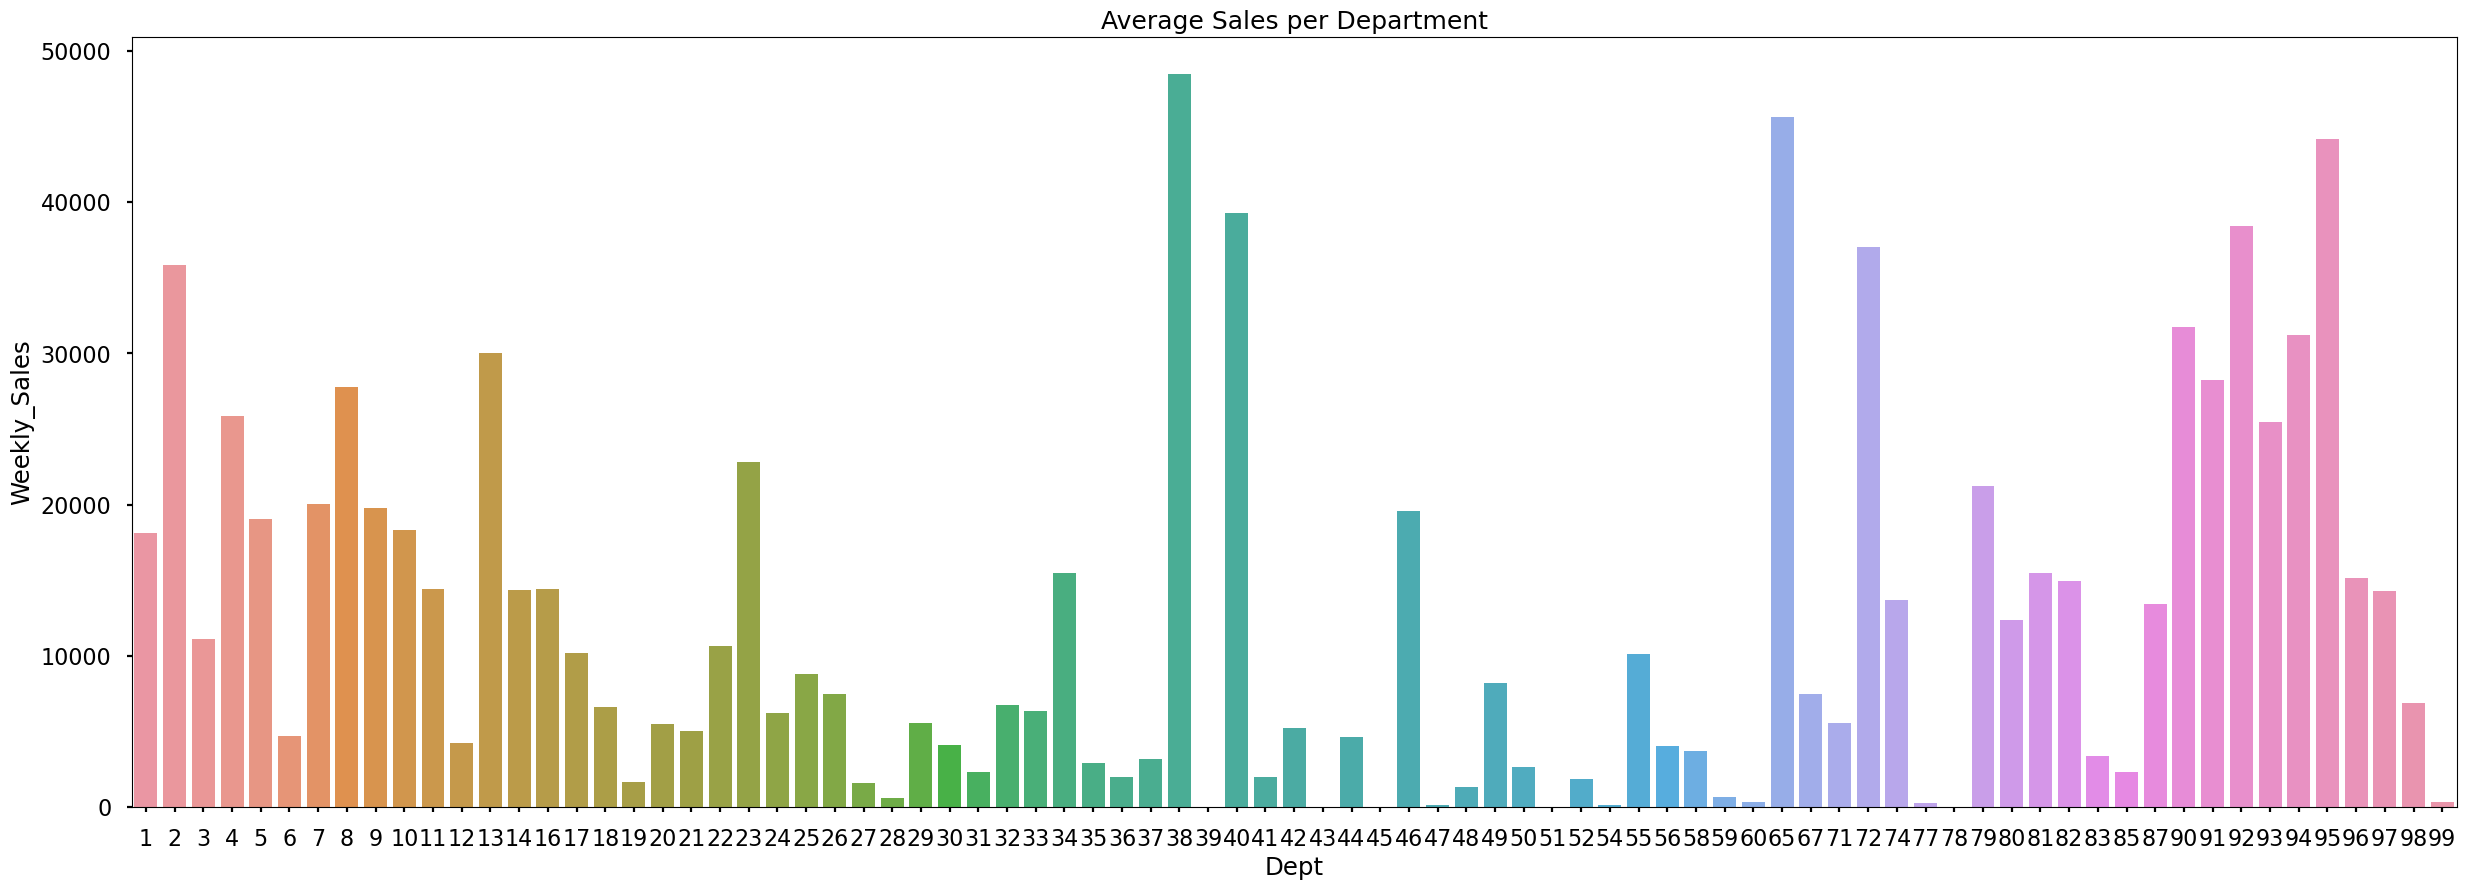

In [ ]:
plt.figure(figsize=(30,10))
plt.title('Average Sales per Department', fontsize=18)
fig = sns.barplot(x='Dept', y='Weekly_Sales', data=df_grouping_dept)

#### Weekly Sales by Stores

In [ ]:
df_grouping_store=df.groupby("Store",as_index=False).mean(numeric_only=True)
df_grouping_store

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
0,1,41.913550,16425.597983,0.057993,68.507857,3.211759,215.820525,7.617244,151315.0,2010.936725,6.428479,25.752506,34649.113951,10752.001790,16742.519626,15933.375908,3969.336262,5456.751374
1,2,41.162984,18437.903244,0.051481,68.690872,3.217209,215.428367,7.652081,202307.0,2010.927790,6.456264,25.862301,44637.369516,12653.151741,19026.699850,17772.909785,5210.874062,6565.144356
2,3,41.057207,4723.016196,0.070045,71.289693,3.219035,219.401345,7.175911,37392.0,2010.965203,6.451914,25.837838,11919.697155,2599.083500,4742.530463,4472.124044,1555.535358,2462.499749
3,4,42.498670,19857.099392,0.059803,63.237001,3.208860,128.564593,6.055033,205863.0,2010.923424,6.360093,25.460266,46064.151328,13462.331380,20545.179055,19403.378539,5340.743313,6085.674939
4,5,41.250223,5022.898796,0.070776,69.204014,3.220744,216.575246,6.296528,34875.0,2010.966674,6.444383,25.808404,11248.769600,3118.540149,5047.092521,4813.906573,1302.024188,2916.868792
5,6,42.972867,18442.663431,0.057552,69.922034,3.220579,217.451908,6.616244,202505.0,2010.953365,6.387175,25.554637,40816.222795,12422.011352,18858.558120,17835.947279,4705.240732,6264.677557
6,7,44.309756,8229.744779,0.061793,42.059441,3.259253,193.658344,8.582686,70713.0,2010.947148,6.639203,26.684925,21160.963818,4330.031567,8366.449103,7784.092103,2897.628246,3740.075386
7,8,43.613034,12952.584519,0.064339,62.572420,3.217917,219.350313,6.098000,155078.0,2010.950684,6.430792,25.737671,27015.410823,8791.585676,13068.947898,12390.735547,3078.813180,5217.858585
8,9,40.016166,7860.947114,0.063510,67.789230,3.223597,219.666940,6.095459,125833.0,2010.973903,6.421940,25.700693,18490.412938,4912.405239,7957.739400,7490.139758,2232.199094,3127.862387
9,10,44.839420,18969.964126,0.059333,72.807164,3.572685,128.591756,8.405803,126512.0,2010.930779,6.397573,25.617935,47857.306906,12979.135764,19793.133901,18473.895265,5641.526958,5827.866715


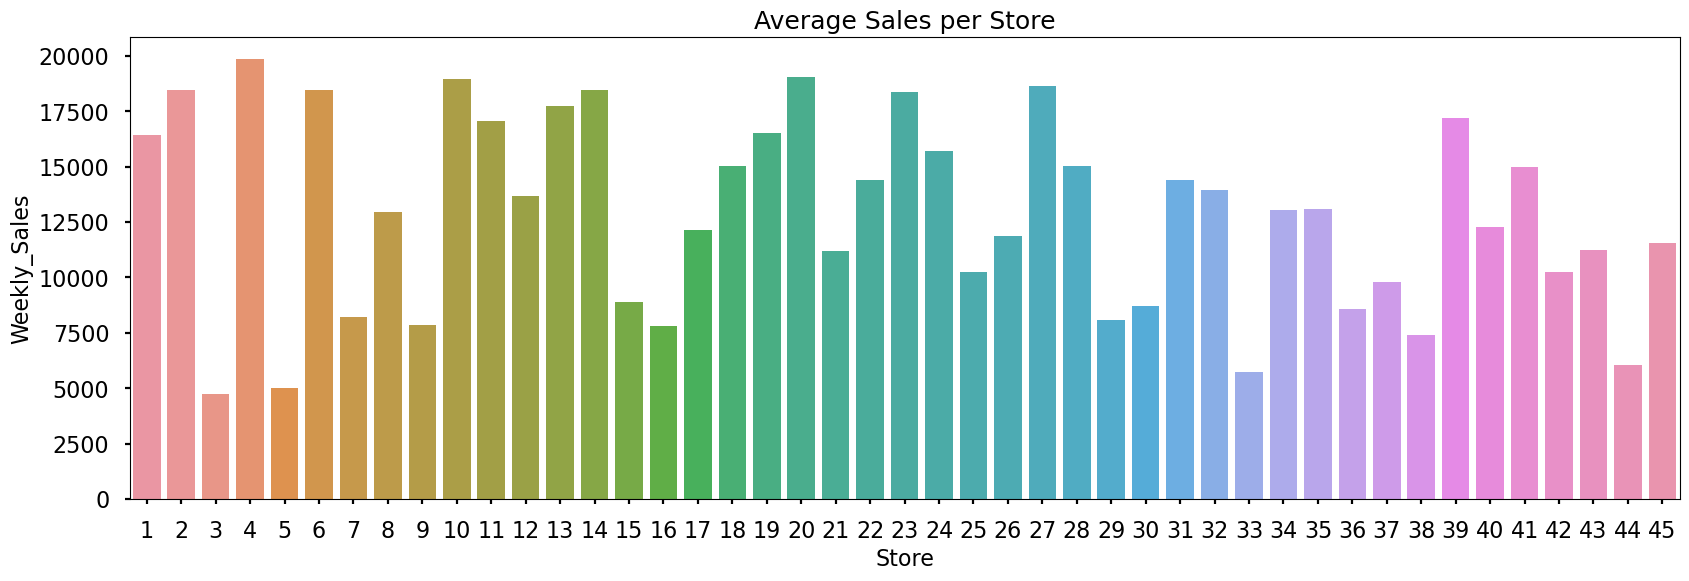

In [ ]:
plt.figure(figsize=(20,6))
plt.title('Average Sales per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
fig = sns.barplot(x='Store', y='Weekly_Sales', data=df_grouping_store)

#### Nhận xét
- Nhìn chung, từ biểu đồ đầu tiên, bộ phận số 38 có doanh thu cao nhất, tiếp theo là bộ phận số 65 và số 95.
Tương tự, một số cửa hàng (Store) có doanh thu cao hơn nhưng trung bình cửa hàng số 4 có doanh thu cao nhất, tiếp theo là cửa hàng số 10 và số 20.

#### Insight
- Các cửa hàng có doanh thu cao
    + Mặc dù có một số cửa hàng có doanh thu cao hơn, cửa hàng số 4 trung bình có doanh thu cao nhất. Điều này có thể là do cửa hàng số 4 duy trì mức doanh thu ổn định và cao qua nhiều khoảng thời gian.
- Ưu tiên cửa hàng số 4, 10 và 20
    + Dựa trên mức trung bình doanh thu, có thể đề xuất ưu tiên chiến lược và quản lý tập trung vào cửa hàng số 4, tiếp theo là cửa hàng số 10 và số 20 để duy trì và tối ưu hóa hiệu suất kinh doanh.
- Cần phân tích thêm về yếu tố ảnh hưởng
    + Để hiểu rõ hơn về sự chênh lệch trong doanh số bán hàng giữa các bộ phận và cửa hàng, cần thực hiện phân tích chi tiết hơn về các yếu tố như vị trí, sản phẩm, chiến lược tiếp thị, và các yếu tố khác có thể ảnh hưởng đến hiệu suất.


## 2.5 Xây dựng Mô hình hồi quy tuyến tính (Linear Regression Model)

Để dự đoán sales trong tương lai, dựa trên data và các dữ liệu đã phân tích, nhóm chúng em lựa chọn Linear Regression Model để phân tích và dự đoán.
<b> Mô hình hồi quy tuyến tính (Linear Regression Model)
<p>Mô hình hồi quy tuyến tính là một kỹ thuật phân tích thống kê được sử dụng để mô hình mối quan hệ giữa một biến phụ thuộc (dependent variable) và một hoặc nhiều biến độc lập (independent variable). Nói cách khác, nó dự đoán giá trị của biến phụ thuộc dựa trên giá trị của các biến độc lập.<p>
    - Biến phụ thuộc: Weekly_Sales
    - Biến độc lập: Các biến còn lại

<b>Đặc điểm chính của hồi quy tuyến tính:

- Hàm tuyến tính: Mô hình giả định mối quan hệ giữa các biến phụ thuộc và độc lập là tuyến tính. Điều này có nghĩa là giá trị của biến phụ thuộc có thể được biểu diễn bằng một hàm tuyến tính của các biến độc lập.
- Ước lượng tham số: Mô hình hồi quy tuyến tính ước lượng các tham số của hàm tuyến tính này (độ dốc và giao điểm) bằng cách sử dụng các kỹ thuật thống kê như phương pháp bình phương sai ít nhất (Ordinary Least Squares - OLS).
- Dự đoán: Sau khi ước lượng các tham số, mô hình có thể được sử dụng để dự đoán giá trị của biến phụ thuộc cho các giá trị mới của các biến độc lập.

### Dummy Variables
Biến giả (dummy variable) là một biến chỉ lấy hai giá trị, thường là 0 và 1. Biến giả thường được sử dụng để đại diện cho các biến định tính (categorical variable) trong các mô hình phân tích dữ liệu.

Từ Data ta có các biến định tính: Store, Dept, Type.

In [ ]:
cat_col = ['Store','Dept','Type']
df_cat = df[cat_col].copy()
df_cat

,Store,Dept,Type
Date,,,
2010-02-05,1,1,A
2010-02-05,17,74,B
2010-02-05,17,78,B
2010-02-05,17,79,B
2010-02-05,17,80,B
...,...,...,...
2012-10-26,5,36,B
2012-10-26,5,38,B
2012-10-26,5,40,B


In [ ]:
df_cat = pd.get_dummies(df_cat,columns=cat_col)
df_cat

,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2012-10-26,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2012-10-26,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df.shape

(374180, 24)

In [ ]:
df = pd.concat([df, df_cat],axis=1)
df.shape

(374180, 153)

In [ ]:
df.drop(columns=cat_col,inplace=True)
df.drop(columns=['Date'],inplace=True)
df

,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Year,Month,Week,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,24924.50,0,42.31,2.572,211.096358,8.106,151315,2010,2,5,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,10218.96,0,23.11,2.666,126.442065,6.548,93188,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,1.00,0,23.11,2.666,126.442065,6.548,93188,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,31042.73,0,23.11,2.666,126.442065,6.548,93188,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,842.00,0,23.11,2.666,126.442065,6.548,93188,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,370.04,0,71.70,3.506,224.037814,5.422,34875,2012,10,43,...,0,0,0,0,0,0,0,0,1,0
2012-10-26,56913.22,0,71.70,3.506,224.037814,5.422,34875,2012,10,43,...,0,0,0,0,0,0,0,0,1,0
2012-10-26,19823.71,0,71.70,3.506,224.037814,5.422,34875,2012,10,43,...,0,0,0,0,0,0,0,0,1,0


### Data Normalization
Trước khi tiến hành phát triển model, dữ liệu cần được chuẩn hoá. <p>
Chuẩn hóa dữ liệu là quá trình chuyển đổi giá trị của một số biến thành các biến có phạm vi tương tự. Chuẩn hóa điển hình bao gồm chia tỷ lệ biến để giá trị trung bình của biến là 0, chia tỷ lệ biến để phương sai là 1 hoặc chia tỷ lệ biến để giá trị biến nằm trong khoảng từ 0 đến 1
</p>

In [ ]:
num_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown','max','min','mean','median','std']

In [ ]:
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(data,col):
  for i in col:
    arr = data[i]
    arr = np.array(arr)
    data[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return data

In [ ]:
df = normalization(df.copy(),num_col)
df

,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Year,Month,Week,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,0.342576,0,0.328495,0.050100,0.840500,0.508787,0.630267,2010,2,5,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0.140455,0,0.105550,0.097194,0.003737,0.321257,0.315637,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0.000014,0,0.105550,0.097194,0.003737,0.321257,0.315637,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0.426668,0,0.105550,0.097194,0.003737,0.321257,0.315637,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0.011573,0,0.105550,0.097194,0.003737,0.321257,0.315637,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,0.005086,0,0.669763,0.518036,0.968419,0.185725,0.000000,2012,10,43,...,0,0,0,0,0,0,0,0,1,0
2012-10-26,0.782246,0,0.669763,0.518036,0.968419,0.185725,0.000000,2012,10,43,...,0,0,0,0,0,0,0,0,1,0
2012-10-26,0.272468,0,0.669763,0.518036,0.968419,0.185725,0.000000,2012,10,43,...,0,0,0,0,0,0,0,0,1,0


### Correlation
Correlation heatmap là một loại biểu đồ được sử dụng để trực quan hóa mối quan hệ giữa các biến. Biểu đồ này hiển thị giá trị tương quan giữa các biến dưới dạng màu sắc. Các giá trị tương quan dương được hiển thị bằng các màu ấm hơn, chẳng hạn như cam và đỏ, trong khi các giá trị tương quan âm được hiển thị bằng các màu lạnh hơn, chẳng hạn như xanh lam và xanh lục.

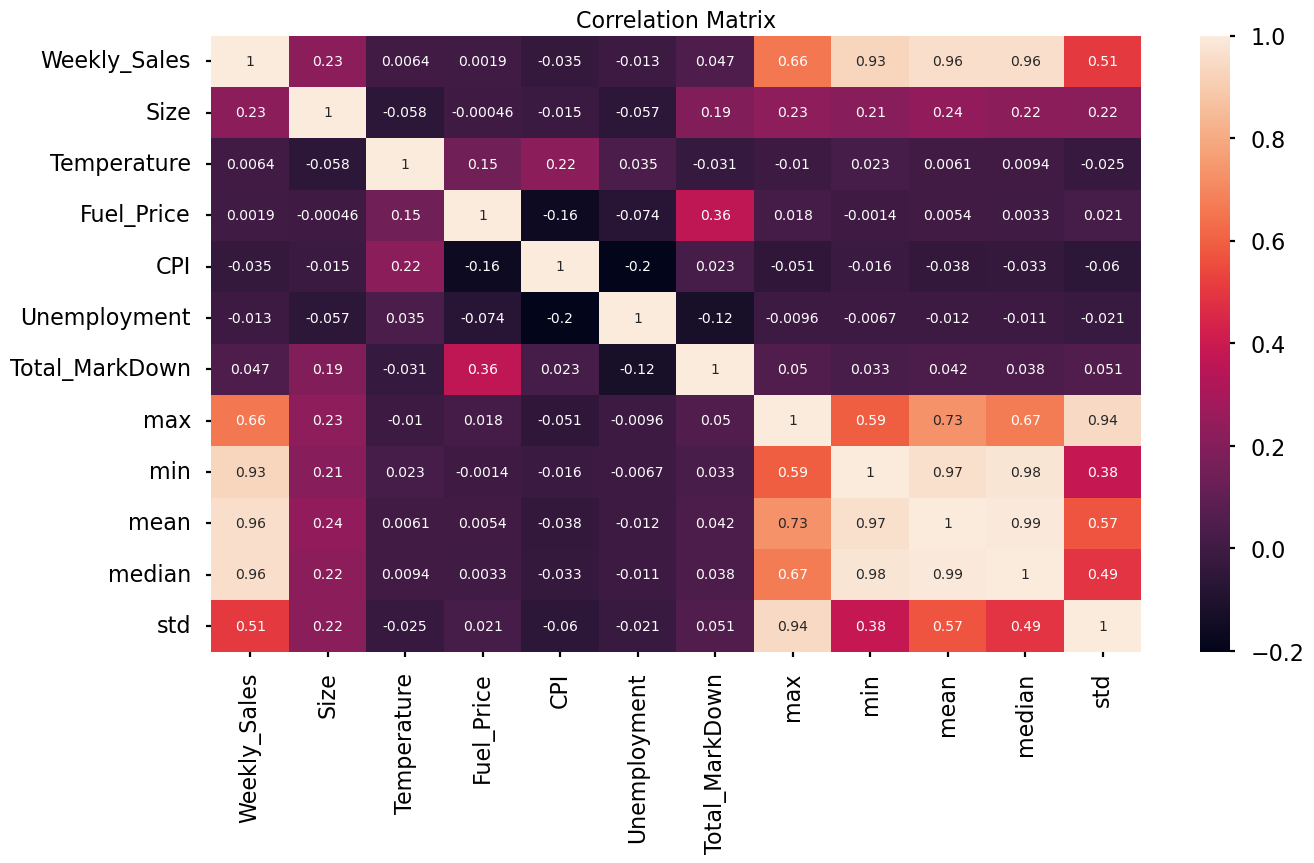

In [ ]:
plt.figure(figsize=(15,8))
corr = df[num_col].corr()
sns.heatmap(corr,vmax=1.0,annot=True)
plt.title('Correlation Matrix',fontsize=16)
plt.show()

#### Các biến được đo lường, bao gồm:
- Weekly Sales (Doanh số hàng tuần)
- Size (Kích thước)
- Temperature (Nhiệt độ)
- Fuel Price (Giá nhiên liệu)
- Unemployment (Tỷ lệ thất nghiệp)
- Total MarkDown (Giảm giá tổng)
- Max (Giá trị tối đa của Weekly Sales)
- Mean (Giá trị trung bình của Weekly Sales)
- Median (Giá trị trung vị của Weekly Sales)
<b>(Max, Mean và Median là giá trị của tuần trước đó, được sử dụng để dự đoán Sales của tuần tiếp theo)<b>

#### Phân tích correlation giữa các biến này cho thấy:
- Giữa Weekly Sales và Size có mối tương quan dương (r = 0,22), nghĩa là doanh số hàng tuần có xu hướng tăng theo kích thước/quy mô cửa hàng. Điều này có thể được giải thích là các cửa hàng có quy mô lớn hơn thường có sự đa dạng và số lượng sản phẩm cao hơn, dẫn đến doanh số cao hơn.
- Giữa Weekly Sales và Temperature có mối tương quan dương yếu (r = 0,0065), nghĩa là doanh số hàng tuần có xu hướng tăng nhẹ theo nhiệt độ. Điều này có thể được giải thích là thời tiết ấm áp hơn có thể khiến mọi người ra ngoài mua sắm nhiều hơn.
- Giữa Weekly Sales và Fuel Price có mối tương quan yếu (r = 0,0019), nghĩa là doanh số hàng tuần không có xu hướng biến động đáng kể theo giá nhiên liệu.
- Giữa Weekly Sales và Unemployment có mối tương quan âm (r = -0,013), nghĩa là doanh số hàng tuần có xu hướng giảm mạnh theo tỷ lệ thất nghiệp. Điều này có thể được giải thích là khi tỷ lệ thất nghiệp cao, mọi người có xu hướng có ít tiền hơn để chi tiêu, dẫn đến doanh số bán hàng thấp hơn.
- Giữa Weekly Sales và Total MarkDown có mối tương quan dương (r = 0,047), nghĩa là doanh số hàng tuần có xu hướng tăng mạnh theo tổng giảm giá. Điều này có thể được giải thích là giảm giá có thể thu hút nhiều khách hàng hơn, dẫn đến doanh số bán hàng cao hơn.


### Modeling

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 374180 entries, 2010-02-05 to 2012-10-26
Columns: 149 entries, Weekly_Sales to Type_C
dtypes: UInt32(1), float64(12), int64(3), object(4), uint8(129)
memory usage: 104.9+ MB


In [ ]:
X = df.drop(['Weekly_Sales'],axis=1)
Y = df.Weekly_Sales

In [ ]:
lm = LinearRegression()
lm

LinearRegression()

In [ ]:
lm.fit(X,Y)

LinearRegression()

In [ ]:
Yhat=lm.predict(X)
Yhat

array([0.29619717597961426, 0.1993873119354248, 0.0022594332695007324,
       ..., 0.27147841453552246, 0.020344853401184082,
       0.013077914714813232], dtype=object)

In [ ]:
lm.intercept_

404772641.7909724

In [ ]:
lm.coef_

array([-4.09685039e+03, -6.84770427e-03,  1.05146520e-02,  1.10958573e-01,
       -3.90073206e-02,  1.26587978e+08, -1.12767564e-02,  9.17690508e-03,
       -1.79605279e-03, -2.37373059e-01, -3.32585451e-02,  1.39890924e+00,
        1.29535945e-01, -4.69807187e-02,  1.54162577e-02,  4.09685934e+03,
        4.09684505e+03,  4.09687192e+03,  4.09682258e+03,  3.33753565e+07,
       -1.56417810e+06,  1.49906518e+07, -4.00073640e+06,  1.67152911e+07,
       -1.69984700e+06, -7.84077728e+06,  3.07969624e+07, -4.56088026e+07,
       -4.60740509e+07, -5.12171780e+06, -3.62935575e+07, -1.34283536e+07,
       -5.98736348e+05, -4.41726309e+07,  1.42033720e+06, -2.32405662e+07,
       -4.20594852e+07, -2.60019497e+06, -2.54743493e+06, -5.54304077e+07,
       -4.13085100e+07, -3.78660833e+07, -2.60019496e+06, -4.71669392e+07,
        3.25544913e+07, -2.85029165e+06, -4.30153760e+06, -2.35489046e+07,
       -2.39835011e+07, -2.55291650e+06, -2.04381555e+06,  1.09860404e+08,
        2.87167063e+07, -

/var/folders/qj/8vx3pdcj7sd505b_9_kx9vqh0000gn/T/ipykernel_29785/1804873631.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/qj/8vx3pdcj7sd505b_9_kx9vqh0000gn/T/ipykernel_29785/1804873631.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




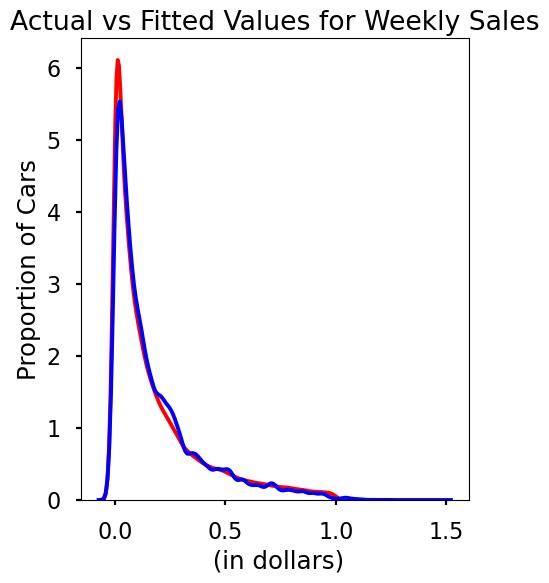

In [ ]:
width=5
height=6
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['Weekly_Sales'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Weekly Sales')
plt.xlabel(' (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=5)

In [ ]:
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
lm_acc = lm.score(X_test,y_test)*100
print("Linear Regressor Accuracy - ",lm_acc)

Linear Regressor Accuracy -  92.47388474342421


In [ ]:
y_pred = lm.predict(X_test)

In [ ]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.030267862853424064
MSE 0.00345565799770229
RMSE 0.05878484496621804
R2 0.924742134874742


In [ ]:
lm_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lm_df

,Actual,Predicted
Date,,
2011-03-04,0.561380,0.510138
2011-04-08,0.333841,0.281838
2010-10-29,0.627379,0.716164
2012-01-27,0.029619,0.021828
2012-08-17,0.808154,0.609466
...,...,...
2010-06-04,0.001240,0.006434
2010-07-30,0.074145,0.067591
2012-09-14,0.084991,0.131809


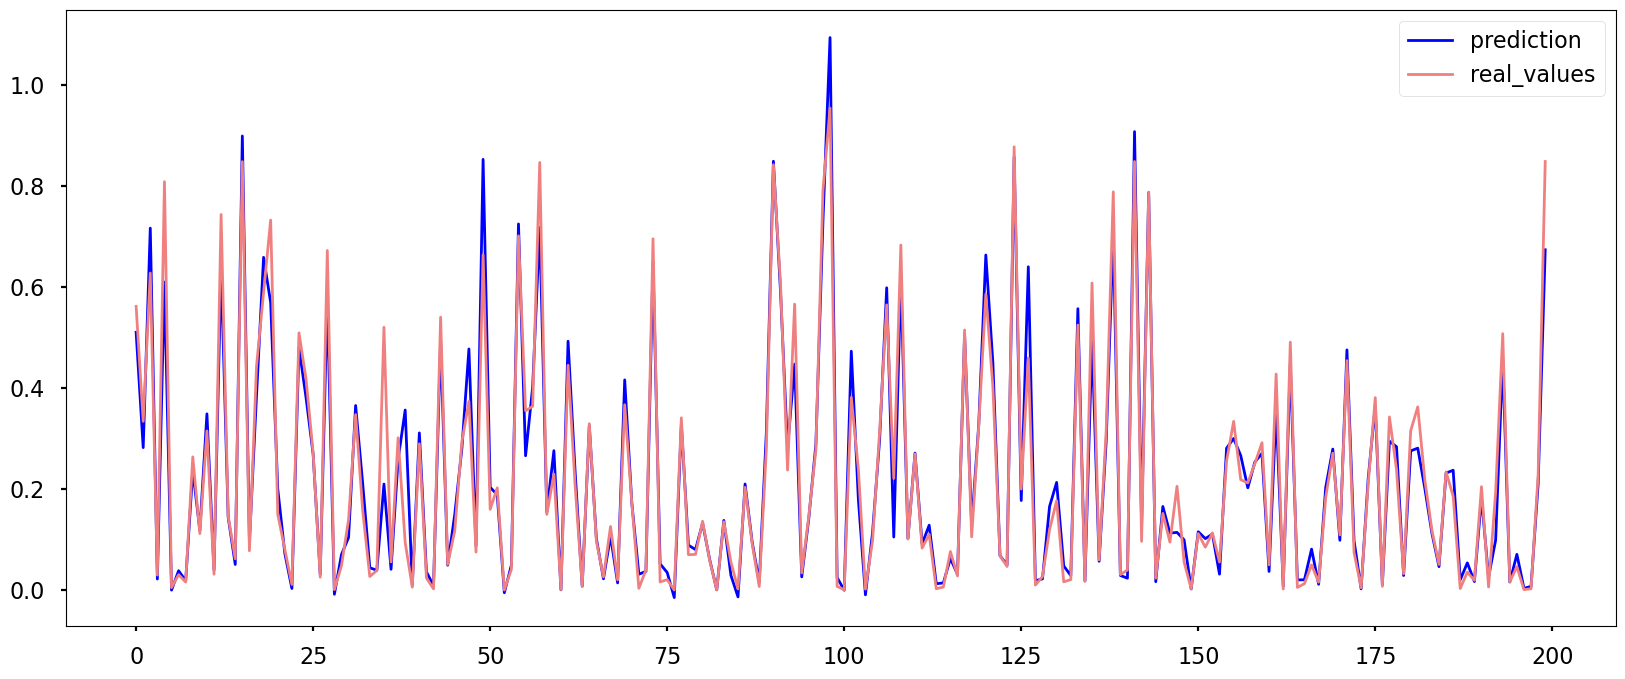

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(lm.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

#### Kết luận:
- Doanh số hàng tuần có xu hướng tăng theo quy mô/kích thước cửa hàng, nhiệt độ và tổng giảm giá.
- Doanh số hàng tuần có xu hướng giảm theo tỷ lệ thất nghiệp.
- Những mối quan hệ này có thể được sử dụng để dự đoán doanh số bán hàng trong tương lai.

- Nhìn tổng quan, có thể thấy rằng các giá trị dự đoán (prediction) và các giá trị thực tế (real_values) có xu hướng đi theo cùng một xu hướng. Điều này có nghĩa là mô hình dự đoán đang hoạt động khá tốt.

- Tuy nhiên, cũng có một số điểm khác biệt đáng chú ý.

    + Tại các giá trị x thấp, các giá trị dự đoán có xu hướng thấp hơn các giá trị thực tế. Điều này có thể là do các giá trị thực tế tại các giá trị x thấp có độ biến động cao hơn.
    + Tại các giá trị x cao, các giá trị dự đoán có xu hướng cao hơn các giá trị thực tế. Điều này có thể là do các giá trị thực tế tại các giá trị x cao có xu hướng bị giới hạn bởi một số yếu tố, chẳng hạn như khả năng cung cấp của hệ thống.

# 4. KẾT LUẬN

Dựa trên phân tích dữ liệu, mô hình hồi quy tuyến tính được sử dụng để dự đoán doanh thu của các cửa hàng của Walmart. Mô hình này sử dụng các biến độc lập sau:
- Weekly Sales (Doanh số hàng tuần)
- Size (Kích thước)
- Temperature (Nhiệt độ)
- Fuel Price (Giá nhiên liệu)
- Unemployment (Tỷ lệ thất nghiệp)
- Total MarkDown (Giảm giá tổng)
- Max (Giá trị tối đa của Weekly Sales)
- Mean (Giá trị trung bình của Weekly Sales)
- Median (Giá trị trung vị của Weekly Sales)


Tuy nhiên, cần lưu ý rằng mô hình này chỉ là một công cụ dự đoán. Doanh thu thực tế của Walmart có thể khác với dự đoán của mô hình do các yếu tố không được tính đến trong mô hình. Các yếu tố này bao gồm:
- Các sự kiện bất ngờ, chẳng hạn như đại dịch COVID-19 hoặc suy thoái kinh tế.
- Sự cạnh tranh từ các cửa hàng bán lẻ khác.
- Thay đổi trong sở thích của người tiêu dùng.

Walmart có thể sử dụng kết quả của phân tích này để đưa ra các quyết định kinh doanh. Ví dụ, công ty có thể mở thêm cửa hàng ở các khu vực có dân số và thu nhập cao. Walmart cũng có thể xem xét các chiến lược tiếp thị mới để thu hút khách hàng ở các khu vực có doanh thu thấp hơn.